## **PROJECT** **NAME** : **PRCL**-**0027**
# **PROJECT** **TEAM** **ID** : **PTID**-**CDS**-**JUNE**-**23**-**1561**

### **BUSINESS CASE** :
- Keeping Inventory of spare in various service
centre to the market demand is always a challenge as most service centres spends significant amount in
spare parts inventory costs. In spite of this, availability of spare parts is been one of the problem areas.


### **PROJECT GOAL:**

- Create Predictive model for inventory forecasting so that service centre achieve JIT
standards.

### **DOMAIN ANLAYSIS :**

- **Invoice Date :** The invoice date is the date the agency received the invoice through any State location. The receipt date is the date the services were received or contractually due.

- **Job Card Date :** A job card is a detailed description of work that is performed for a work order. You use the Job Cards application to create and manage job cards.

- **Business Partner Name :** Name of the Business partner.

- **Vehicle No :** vehicle number.

- **vehicle Model :** A car's make is the brand of the vehicle, while the model refers to the name of a car product and sometimes a range of products.

- **Current KM Reading :** Reading of Kilometer before doing the Service.

- **Invoice Line Text :** Invoice line text refers to the description of the product or service that is being invoiced. It is a brief and concise explanation of the item being billed, usually included alongside the price and quantity on an invoice.

###  IMPORTING LIBRARIES 

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
!pip install mysql-connector-python

/bin/sh: pip: command not found


## Connection

In [3]:
import mysql.connector
import pandas as pd

#Port No 18.136.157.135
#DB Name: project_service_data
#Table Name: service_data
#Domain Name: projects.datamites.com
#Username : dm_usdata_sql
#Password: 37z<49REb&mKnl4AV!vJ
    
# Database connection parameters
db_params = {
    "host": "18.136.157.135",
    "user": "dm_usdata_sql",
    "password": "37z<49REb&mKnl4AV!vJ",
    "database": "project_service_data"
}

# Establish the connection
try:
    connection = mysql.connector.connect(**db_params)
    cursor = connection.cursor()

    # Query to retrieve data from the table
    query = "SELECT * FROM service_data"
    cursor.execute(query)

    # Fetch all the data
    data = cursor.fetchall()

    # Convert the data to a DataFrame
    column_names = [desc[0] for desc in cursor.description]
    df = pd.DataFrame(data, columns=column_names)

    # Save the DataFrame to a CSV file
    df.to_csv("data.csv", index=False)

except mysql.connector.Error as err:
    print("Error:", err)

finally:
    # Close the connection
    if connection.is_connected():
        cursor.close()
        connection.close()


ModuleNotFoundError: No module named 'mysql'

## Basic Check

In [4]:
df

invoice_date job_card_date business_partner_name  vehicle_no  \
0         30-05-17      30-05-17        shivXXXXXXXXXX  KA03MFXXXX   
1         02-06-17      31-05-17        KIRAXXXXXXXXXX  KA53ESXXXX   
2         02-06-17      31-05-17        KIRAXXXXXXXXXX  KA53ESXXXX   
3         02-06-17      31-05-17        KIRAXXXXXXXXXX  KA53ESXXXX   
4         02-06-17      31-05-17        KIRAXXXXXXXXXX  KA53ESXXXX   
...            ...           ...                   ...         ...   
28477     06-01-19      06-01-19        pravXXXXXXXXXX  KA53EVXXXX   
28478     06-01-19      06-01-19        pravXXXXXXXXXX  KA53EVXXXX   
28479     06-01-19      06-01-19        pravXXXXXXXXXX  KA53EVXXXX   
28480     06-01-19      06-01-19        pravXXXXXXXXXX  KA53EVXXXX   
28481     06-01-19      06-01-19        pravXXXXXXXXXX  KA53EVXXXX   

                  vehicle_model current_km_reading invoice_line_text  
0      BAJAJ AVENGER STREET 220              50000        ENGINE OIL  
1           BAJAJ PULSAR NS 200                758        ENGINE OIL  
2           BAJAJ PULSAR NS 200                758            POLISH  
3           BAJAJ PULSAR NS 200                758       CONSUMABLES  
4           BAJAJ PULSAR NS 200                758       COOLANT OIL  
...                         ...                ...               ...  
28477        BAJAJ DISCOVER 125              12805   SPROCKET RUBBER  
28478        BAJAJ DISCOVER 125              12805      CLUTCH CABLE  
28479        BAJAJ DISCOVER 125              12805        OIL FILTER  
28480        BAJAJ DISCOVER 125              12805          DISC OIL  
28481        BAJAJ DISCOVER 125              12805        AIR FILTER  

[28482 rows x 7 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28482 entries, 0 to 28481
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   invoice_date           28482 non-null  object
 1   job_card_date          28482 non-null  object
 2   business_partner_name  28482 non-null  object
 3   vehicle_no             28482 non-null  object
 4   vehicle_model          28482 non-null  object
 5   current_km_reading     28482 non-null  object
 6   invoice_line_text      28476 non-null  object
dtypes: object(7)
memory usage: 1.5+ MB


In [6]:

for i in df.columns:
    print(f'No. of unique values in {i} column is :', df[i].unique().size)

No. of unique values in invoice_date column is : 555
No. of unique values in job_card_date column is : 553
No. of unique values in business_partner_name column is : 1010
No. of unique values in vehicle_no column is : 846
No. of unique values in vehicle_model column is : 28
No. of unique values in current_km_reading column is : 3474
No. of unique values in invoice_line_text column is : 504


In [7]:
df.describe()

invoice_date job_card_date business_partner_name  vehicle_no  \
count         28482         28482                 28482       28482   
unique          555           553                  1010         846   
top        01-12-18      01-12-18        venkXXXXXXXXXX  KA53EVXXXX   
freq            179           179                   424        1313   

           vehicle_model current_km_reading invoice_line_text  
count              28482              28482             28476  
unique                28               3474               503  
top     BAJAJ PULSAR 150                  0        ENGINE OIL  
freq                8633                842              3802

In [8]:
print('No.of rows in the data :',df.shape[0])
print('No.of columns in the data :',df.shape[1])
df.shape

No.of rows in the data : 28482
No.of columns in the data : 7


(28482, 7)

In [9]:
df.isna().sum()

invoice_date             0
job_card_date            0
business_partner_name    0
vehicle_no               0
vehicle_model            0
current_km_reading       0
invoice_line_text        6
dtype: int64

In [10]:
pd.DataFrame(df.dtypes,columns=['DType'])

DType
invoice_date           object
job_card_date          object
business_partner_name  object
vehicle_no             object
vehicle_model          object
current_km_reading     object
invoice_line_text      object

In [11]:
df['invoice_line_text'].fillna(df['invoice_line_text'].mode()[0], inplace = True)

# removing the null values

In [12]:
df.isna().sum()

invoice_date             0
job_card_date            0
business_partner_name    0
vehicle_no               0
vehicle_model            0
current_km_reading       0
invoice_line_text        0
dtype: int64

### Checking Duplicates

In [13]:
df[df.duplicated()]

invoice_date job_card_date business_partner_name  vehicle_no  \
40        03-06-17      31-05-17        MAYAXXXXXXXXXX  KA05JGXXXX   
43        05-06-17      01-06-17        srivXXXXXXXXXX  KA02EWXXXX   
579       13-06-17      13-06-17        subhXXXXXXXXXX  KA53J9XXXX   
633       15-06-17      14-06-17        naveXXXXXXXXXX  KA53W3XXXX   
635       15-06-17      14-06-17        naveXXXXXXXXXX  KA53W3XXXX   
...            ...           ...                   ...         ...   
28216     02-01-19      02-01-19        RITEXXXXXXXXXX  MH12LFXXXX   
28229     03-01-19      03-01-19        GLENXXXXXXXXXX  KA53EVXXXX   
28318     04-01-19      04-01-19        ALOKXXXXXXXXXX  KA53EWXXXX   
28346     04-01-19      04-01-19        yeshXXXXXXXXXX  KA40ECXXXX   
28450     05-01-19      05-01-19        ashoXXXXXXXXXX  KA53EPXXXX   

                  vehicle_model current_km_reading invoice_line_text  
40             BAJAJ PULSAR 220              25000          DISC PAD  
43             BAJAJ PULSAR 150              41458  BRAKE ADJUSTMENT  
579    BAJAJ AVENGER STREET 220              14484          SILENCER  
633          BAJAJ DISCOVER 150              25677        ENGINE OIL  
635          BAJAJ DISCOVER 150              25677        ENGINE OIL  
...                         ...                ...               ...  
28216          BAJAJ PULSAR 150              19114  SPROCKET BEARING  
28229       BAJAJ PULSAR NS 160              11113        BRAKE SHOE  
28318              BAJAJ CT 100              27786        BRAKE SHOE  
28346          BAJAJ PULSAR 220              11541          DISC PAD  
28450          BAJAJ PULSAR 150              22413        BRAKE SHOE  

[386 rows x 7 columns]

In [14]:
df.drop_duplicates(keep='first',inplace=True)

## EDA

### Business_partner_name

In [15]:
df.business_partner_name.unique()

array(['shivXXXXXXXXXX', 'KIRAXXXXXXXXXX', 'pattXXXXXXXXXX', ...,
       'THOPXXXXXXXXXX', 'yeshXXXXXXXXXX', 'jithXXXXXXXXXX'], dtype=object)

In [16]:
df.business_partner_name.value_counts()

venkXXXXXXXXXX    416
manjXXXXXXXXXX    354
prasXXXXXXXXXX    320
chanXXXXXXXXXX    311
raviXXXXXXXXXX    307
                 ... 
ARGHXXXXXXXXXX      1
SUMAXXXXXXXXXX      1
a veXXXXXXXXXX      1
revaXXXXXXXXXX      1
VIRUXXXXXXXXXX      1
Name: business_partner_name, Length: 1010, dtype: int64

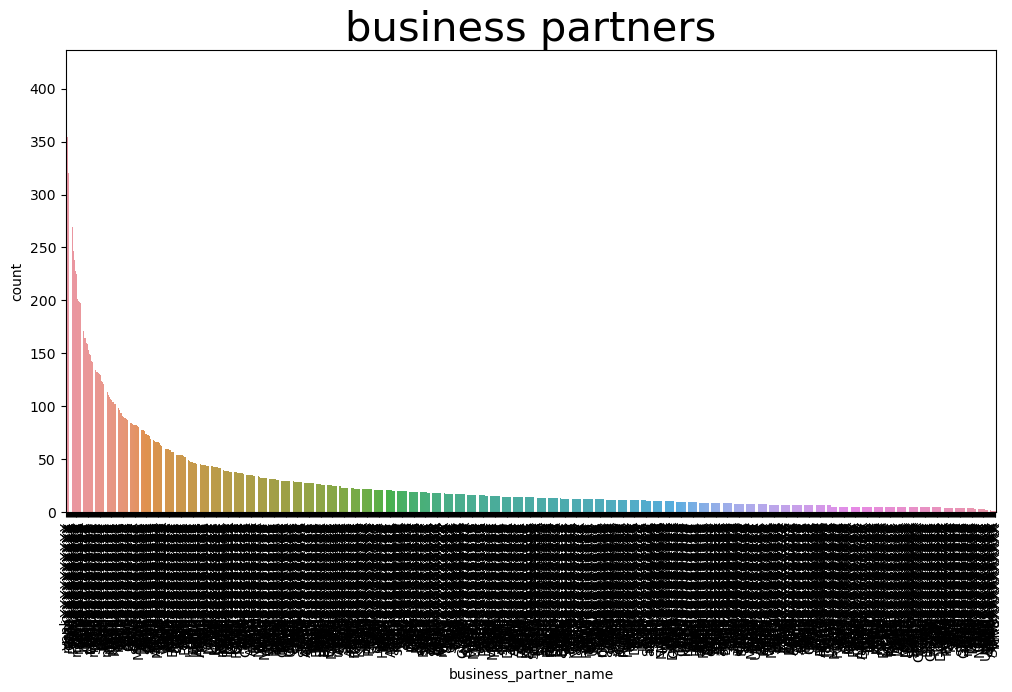

In [17]:
plt.figure(figsize=(12,6))
sns.countplot(x=df.business_partner_name,order=df['business_partner_name'].value_counts().index) 
plt.title('business partners', size=30)
plt.xticks(rotation=90)
plt.show()

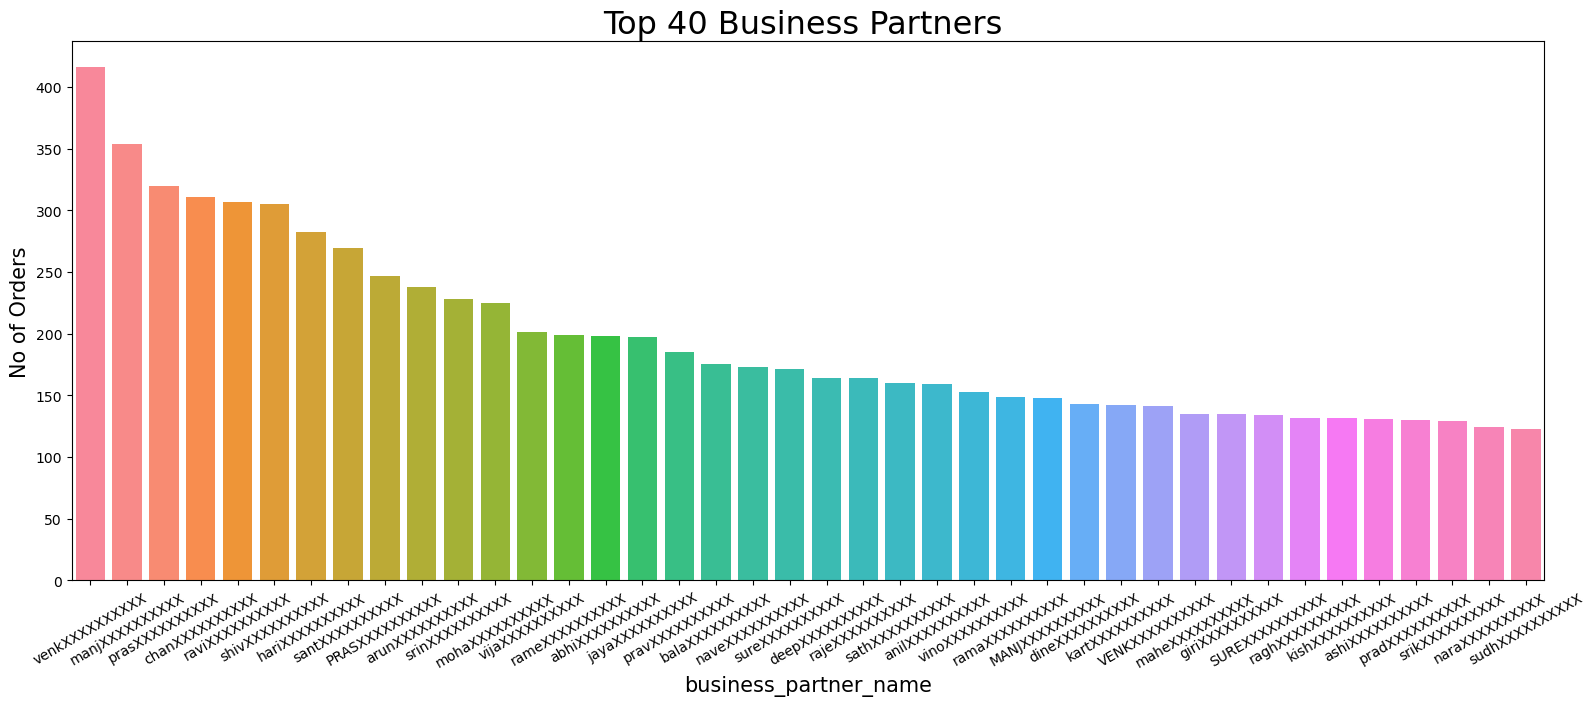

In [18]:
plt.figure(figsize=[19,7])
sns.countplot(x=df['business_partner_name'],order=df['business_partner_name'].value_counts().iloc[:40].index,saturation=15)
plt.xlabel("business_partner_name",fontdict={'fontsize':15},color='black')
plt.ylabel('No of Orders',fontdict={'fontsize':15},color='black')
plt.xticks(rotation=30)
plt.title("Top 40 Business Partners ",fontdict={'fontsize':23});

- Out of all business partners venkxxxxxxx has the highest number of orders.

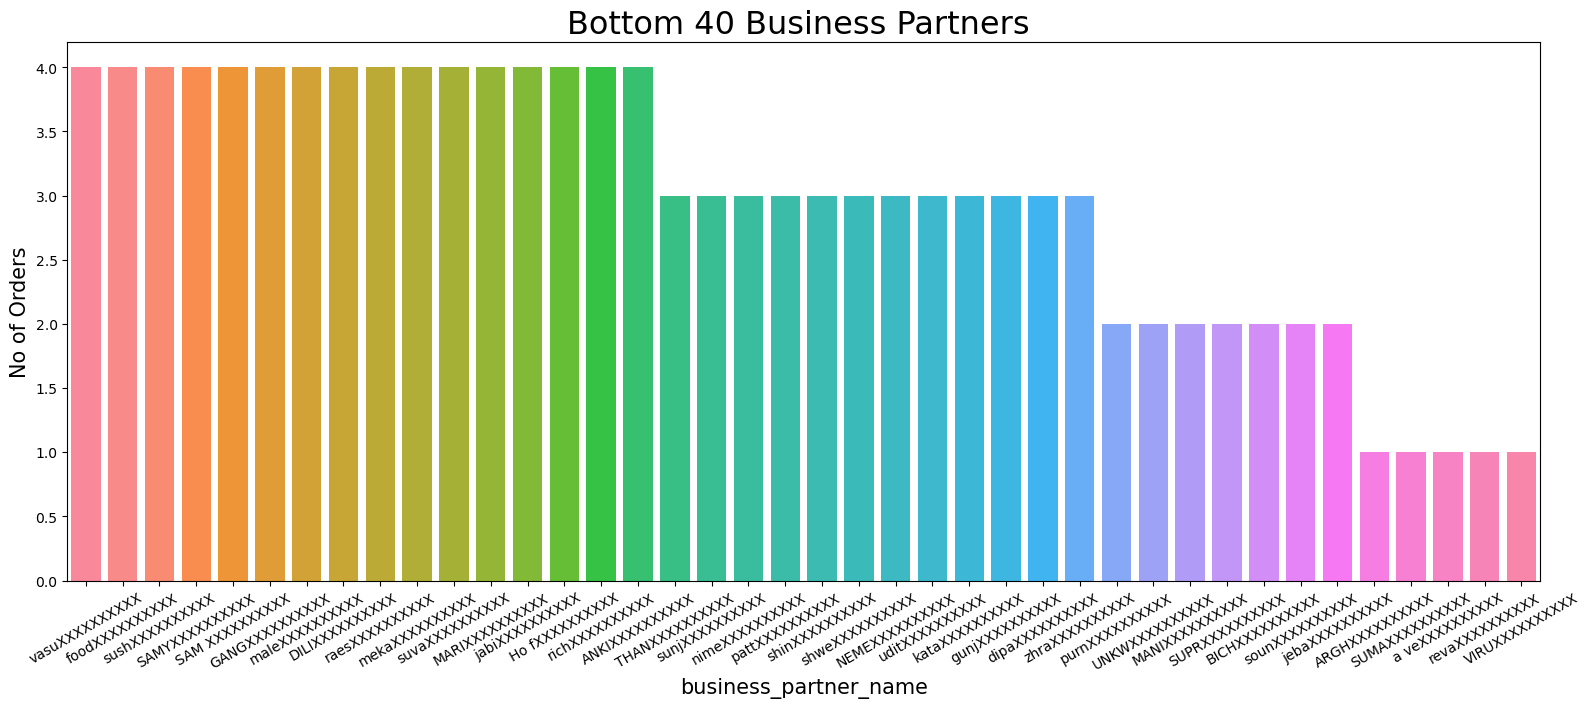

In [19]:
plt.figure(figsize=[19,7])
sns.countplot(x=df['business_partner_name'],order=df['business_partner_name'].value_counts().iloc[-40:].index,saturation=15)
plt.xlabel("business_partner_name",fontdict={'fontsize':15},color='black')
plt.ylabel('No of Orders',fontdict={'fontsize':15},color='black')
plt.xticks(rotation=30)
plt.title("Bottom 40 Business Partners ",fontdict={'fontsize':23});

- Out of all business partners the least orders are A ve, VIRU, Reva, Suma,Argh .

## vehicle_no

In [20]:
df.vehicle_no.unique()

array(['KA03MFXXXX', 'KA53ESXXXX', 'KA53EMXXXX', 'KA53S3XXXX',
       'KA53ERXXXX', 'KA05JGXXXX', 'KA02EWXXXX', 'KA53EQXXXX',
       'KA51EVXXXX', 'ka 53 XXXX', 'KA03JJXXXX', 'KA53V3XXXX',
       'KA53S9XXXX', 'KA44K6XXXX', 'KA03HSXXXX', 'KA53EPXXXX',
       'KA02EJXXXX', 'KA53X6XXXX', 'KA03JGXXXX', 'KA53ENXXXX',
       'AYUSHXXXX', 'KA53EDXXXX', 'KA03JLXXXX', 'KA01HRXXXX',
       'KA023JXXXX', 'KA03HVXXXX', 'KA51ECXXXX', 'KA09HFXXXX',
       'KA27V8XXXX', 'KA07S4XXXX', 'TS08FAXXXX', 'KA53X2XXXX',
       'KA53ELXXXX', 'KA51X3XXXX', 'KA05HCXXXX', 'KA04JDXXXX',
       'KA53W3XXXX', 'KA03JCXXXX', 'KA51L8XXXX', 'KA40X6XXXX',
       'KA02HGXXXX', 'KHXXXX', 'MH12JDXXXX', 'MUNRAJXXXX', 'KA53S5XXXX',
       'KA53J9XXXX', 'KA01HNXXXX', 'KA04EVXXXX', 'KA03JAXXXX',
       'KA04HZXXXX', 'KA11ECXXXX', 'KA01HMXXXX', 'TN29BBXXXX',
       'KA04HWXXXX', 'KA05JDXXXX', 'KA53ETXXXX', 'KA01HFXXXX',
       'KA53EJXXXX', 'KA04JFXXXX', 'KA51ENXXXX', 'KA03JEXXXX',
       'KA02HJXXXX', 'KA01EYXXXX', 'KA54EMXXXX

In [21]:
df.vehicle_no.value_counts()

KA53EVXXXX    1299
KA53EQXXXX    1273
KA53ETXXXX    1205
KA53ERXXXX    1181
KA53ESXXXX    1114
              ... 
AP04BVXXXX       1
KA04EUXXXX       1
AP16BXXXXX       1
NS200XXXX        1
KA03MFXXXX       1
Name: vehicle_no, Length: 846, dtype: int64

In [22]:
df['State'] = df['vehicle_no'].str[:-8]

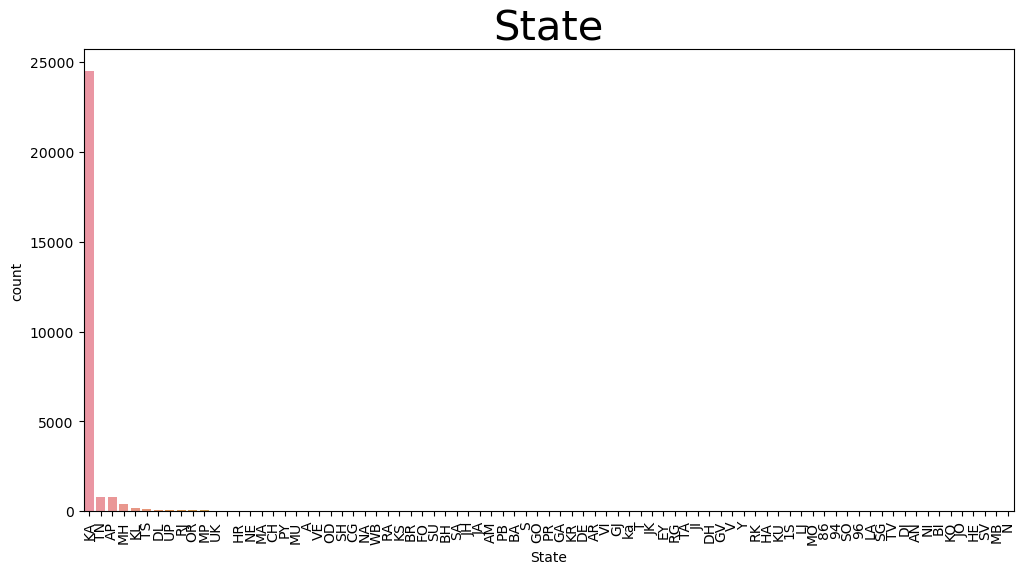

In [23]:
plt.figure(figsize=(12,6))
sns.countplot(x=df.State,order=df['State'].value_counts().index) 
plt.title('State', size=30)
plt.xticks(rotation=90)
plt.show()

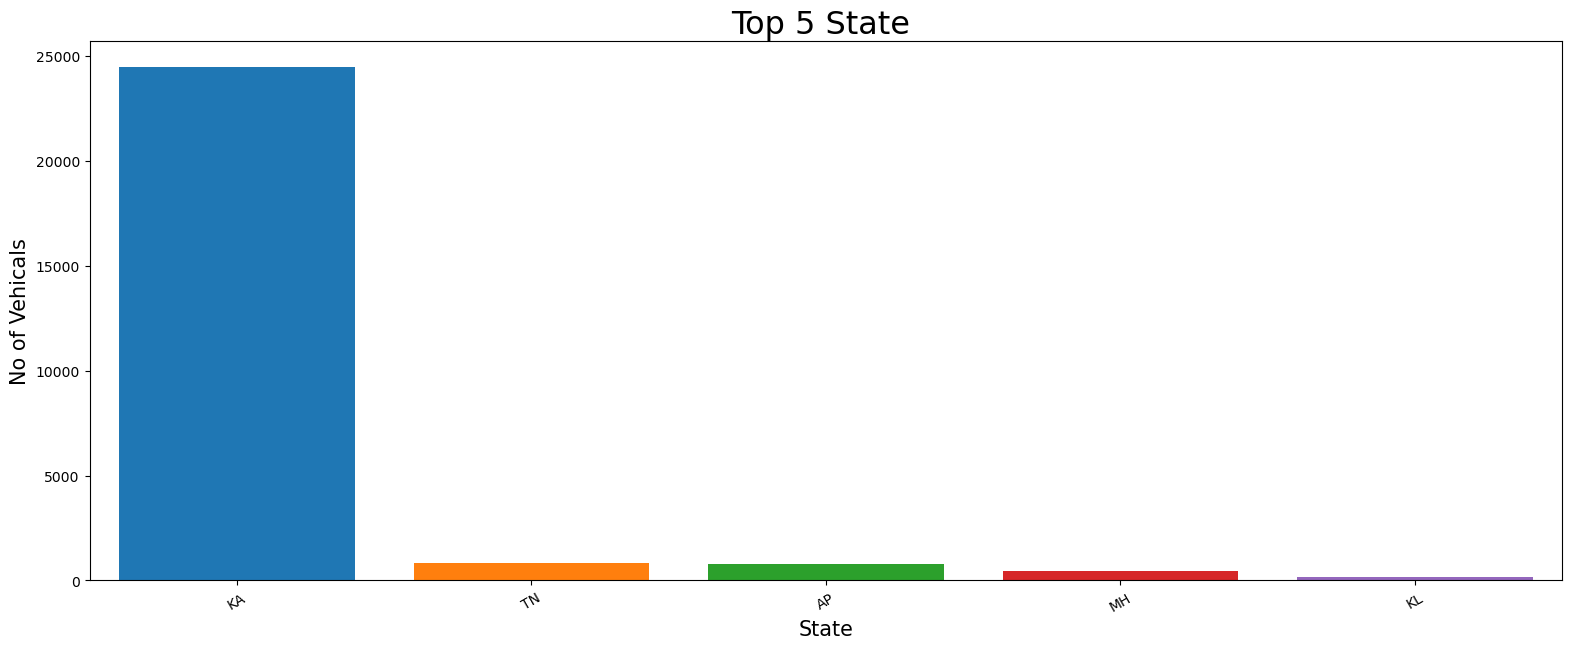

In [24]:
plt.figure(figsize=[19,7])
sns.countplot(x=df['State'],order=df['State'].value_counts().iloc[:5].index,saturation=15)
plt.xlabel("State",fontdict={'fontsize':15},color='black')
plt.ylabel('No of Vehicals',fontdict={'fontsize':15},color='black')
plt.xticks(rotation=30)
plt.title("Top 5 State ",fontdict={'fontsize':23});

- The majority of vehicles are registered in Karnataka.

## vehicle_model

In [25]:
df.vehicle_model.value_counts()

BAJAJ PULSAR 150            8501
BAJAJ AVENGER STREET 220    4162
BAJAJ PULSAR 220            2608
BAJAJ PULSAR 180            2238
BAJAJ PULSAR NS 200         2180
BAJAJ CT 100                1401
BAJAJ DISCOVER 125          1340
BAJAJ AVENGER STREET        1103
BAJAJ PLATINA                830
BAJAJ V150                   684
BAJAJ DISCOVER               659
BAJAJ PULSAR LS135           517
BAJAJ PULSAR AS 200          413
BAJAJ PULSAR NS 160          361
BAJAJ PULSAR RS 200          310
BAJAJ DISCOVER 150           279
BAJAJ AVENGER STREET 180     121
BAJAJ DISCOVER 135           113
BAJAJ V125                    92
BAJAJ V                       54
BAJAJ CALIBER                 40
BAJAJ XCD 125                 27
BAJAJ V15                     23
BAJAJ XCD 135                 13
WAVE                          10
BAJAJ DOMINAR 400 ABS          7
BAJAJ WIND 125                 6
BAJAJ BOXER CT                 4
Name: vehicle_model, dtype: int64

In [26]:
df.vehicle_model.unique()

array(['BAJAJ AVENGER STREET 220', 'BAJAJ PULSAR NS 200', 'BAJAJ PLATINA',
       'BAJAJ V', 'BAJAJ PULSAR 150', 'BAJAJ PULSAR 220',
       'BAJAJ PULSAR 180', 'BAJAJ AVENGER STREET', 'BAJAJ CT 100',
       'BAJAJ DISCOVER', 'BAJAJ PULSAR LS135', 'BAJAJ DISCOVER 125',
       'BAJAJ V150', 'BAJAJ BOXER CT', 'BAJAJ PULSAR RS 200',
       'BAJAJ DISCOVER 150', 'BAJAJ PULSAR AS 200', 'BAJAJ XCD 125',
       'BAJAJ V125', 'BAJAJ WIND 125', 'BAJAJ DISCOVER 135',
       'BAJAJ PULSAR NS 160', 'BAJAJ CALIBER', 'BAJAJ XCD 135', 'WAVE',
       'BAJAJ AVENGER STREET 180', 'BAJAJ V15', 'BAJAJ DOMINAR 400 ABS'],
      dtype=object)

In [27]:
data_vehicle_model=df.groupby('vehicle_model').count()
data_vehicle_model

invoice_date  job_card_date  business_partner_name  \
vehicle_model                                                                  
BAJAJ AVENGER STREET              1103           1103                   1103   
BAJAJ AVENGER STREET 180           121            121                    121   
BAJAJ AVENGER STREET 220          4162           4162                   4162   
BAJAJ BOXER CT                       4              4                      4   
BAJAJ CALIBER                       40             40                     40   
BAJAJ CT 100                      1401           1401                   1401   
BAJAJ DISCOVER                     659            659                    659   
BAJAJ DISCOVER 125                1340           1340                   1340   
BAJAJ DISCOVER 135                 113            113                    113   
BAJAJ DISCOVER 150                 279            279                    279   
BAJAJ DOMINAR 400 ABS                7              7                      7   
BAJAJ PLATINA                      830            830                    830   
BAJAJ PULSAR 150                  8501           8501                   8501   
BAJAJ PULSAR 180                  2238           2238                   2238   
BAJAJ PULSAR 220                  2608           2608                   2608   
BAJAJ PULSAR AS 200                413            413                    413   
BAJAJ PULSAR LS135                 517            517                    517   
BAJAJ PULSAR NS 160                361            361                    361   
BAJAJ PULSAR NS 200               2180           2180                   2180   
BAJAJ PULSAR RS 200                310            310                    310   
BAJAJ V                             54             54                     54   
BAJAJ V125                          92             92                     92   
BAJAJ V15                           23             23                     23   
BAJAJ V150                         684            684                    684   
BAJAJ WIND 125                       6              6                      6   
BAJAJ XCD 125                       27             27                     27   
BAJAJ XCD 135                       13             13                     13   
WAVE                                10             10                     10   

                          vehicle_no  current_km_reading  invoice_line_text  \
vehicle_model                                                                 
BAJAJ AVENGER STREET            1103                1103               1103   
BAJAJ AVENGER STREET 180         121                 121                121   
BAJAJ AVENGER STREET 220        4162                4162               4162   
BAJAJ BOXER CT                     4                   4                  4   
BAJAJ CALIBER                     40                  40                 40   
BAJAJ CT 100                    1401                1401               1401   
BAJAJ DISCOVER                   659                 659                659   
BAJAJ DISCOVER 125              1340                1340               1340   
BAJAJ DISCOVER 135               113                 113                113   
BAJAJ DISCOVER 150               279                 279                279   
BAJAJ DOMINAR 400 ABS              7                   7                  7   
BAJAJ PLATINA                    830                 830                830   
BAJAJ PULSAR 150                8501                8501               8501   
BAJAJ PULSAR 180                2238                2238               2238   
BAJAJ PULSAR 220                2608                2608               2608   
BAJAJ PULSAR AS 200              413                 413                413   
BAJAJ PULSAR LS135               517                 517                517   
BAJAJ PULSAR NS 160              361                 361                361   
BAJAJ PULSAR NS 200             2180         

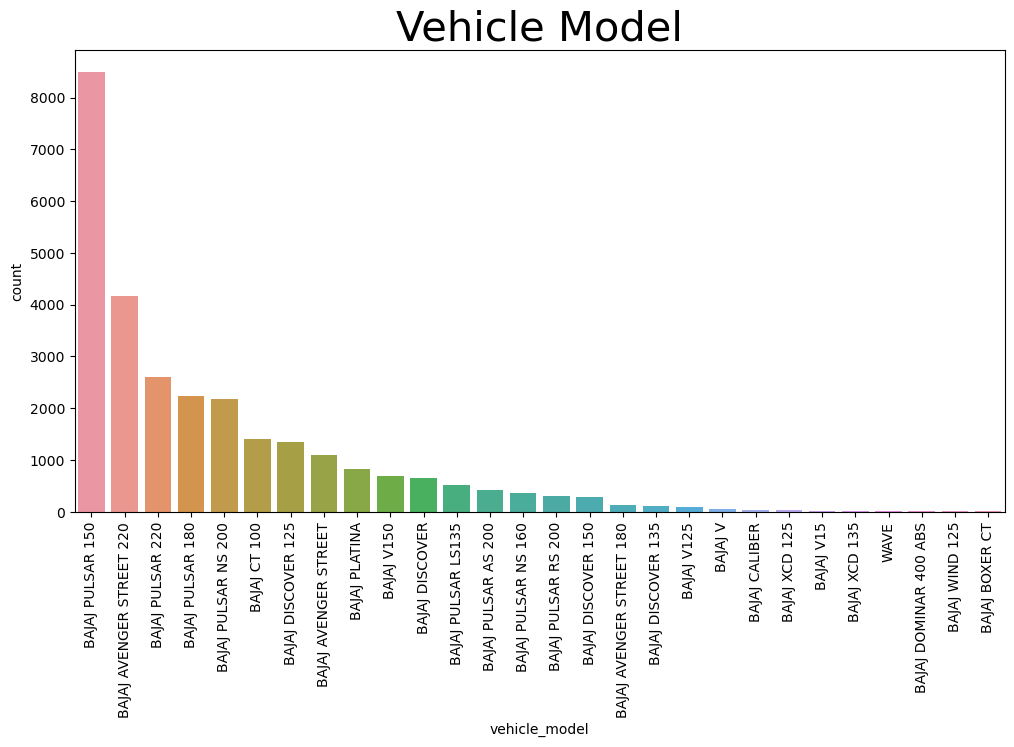

In [28]:
plt.figure(figsize=(12,6))
sns.countplot(x=df.vehicle_model, order=df['vehicle_model'].value_counts().index)
plt.title('Vehicle Model', size=30)
plt.xticks(rotation=90)
plt.yticks(fontsize=10)
plt.show()



- Out of all vehicle models Bajaj Pulsar 150 has ordered most.
- Out of all vehicle models Bajaj Boxer CT has ordered least.

## invoice_line_text

In [29]:
df.invoice_line_text.value_counts()

ENGINE OIL           3782
CHAIN LUBRICATION    3417
GENERAL SERVICE      2132
AIR FILTER           1698
3M OIL               1615
                     ... 
CLUTCH ROLLERS          1
CLUTCH SPRING KIT       1
CLUTCH SHOE             1
U BUSH                  1
HELMET                  1
Name: invoice_line_text, Length: 503, dtype: int64

In [30]:
df.invoice_line_text.unique()

array(['ENGINE OIL', 'POLISH', 'CONSUMABLES', 'COOLANT OIL',
       'CHAIN LUBRICATION', '4 WAY SWITCH', '3M OIL', 'GENERAL SERVICE',
       'OIL FILTER', 'INDICATOR', 'HEAD REST', 'VALVE GUIDE',
       'TIMMING CHAIN', 'FOOT REST', 'LOW BEAM BULB', 'VALVE GRAINDING',
       'DISC PAD', 'LOADING GEAR', 'PACKING KIT', 'TIMMING CHAIN PAD',
       'TENSIONER', 'CLUTCH BELL REST', 'CLUTCH ASSEMBLY', 'VALVE KIT',
       'SPARK PLUG', 'ONE WAY CLUTCH', 'BORE KIT', 'AIR FILTER',
       'HEAD RUBBER', 'CLUTCH CABLE', 'CRANK SHAFT', 'BRAKE ADJUSTMENT',
       'BRAKE SHOE', 'AIR FILTER CHECKUP', 'DRUM BOLT WASHER',
       'TANK CLEANING', 'FORK BEND', 'GEAR SHAFT', 'CLUTCH COVER GASKET',
       'INDICATOR BULB', 'GEAR LEVER', 'HANDLEBAR', 'CRASH GUARD',
       'FORK OIL SEAL', 'FORK OIL', 'SIDE SHIELD', 'VISIOR',
       'FORK CONE SET', 'HEAD LIGHT DOOM', 'TANK ASSEMBLY',
       'Clutch cable', 'DISC LEVER', 'CARBURETOR CLEANING', 'SEAT COVER',
       'BUZZER', 'TAIL LAMP BULB', 'DISC OIL', 'DIS

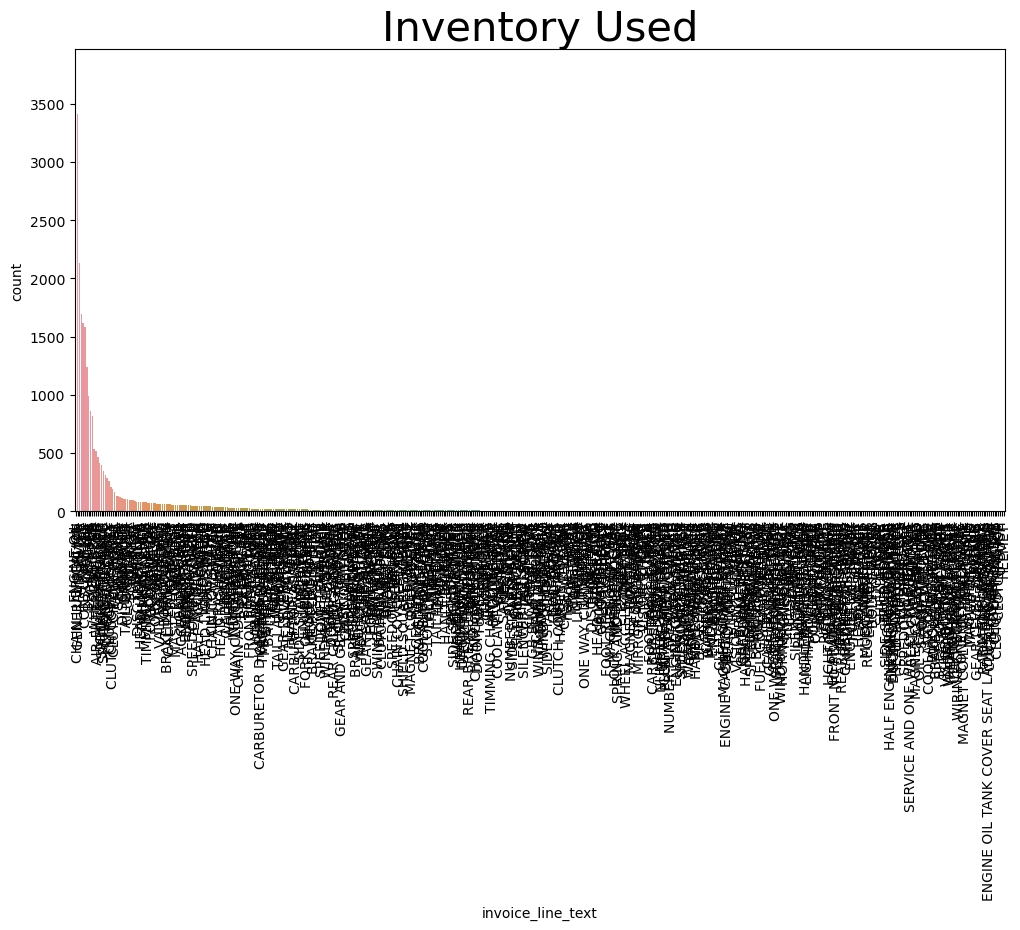

In [31]:
plt.figure(figsize=(12,6))
sns.countplot(x=df.invoice_line_text, order=df['invoice_line_text'].value_counts().index)
plt.title('Inventory Used', size=30)
plt.xticks(rotation=90)
plt.yticks(fontsize=10)
plt.show()


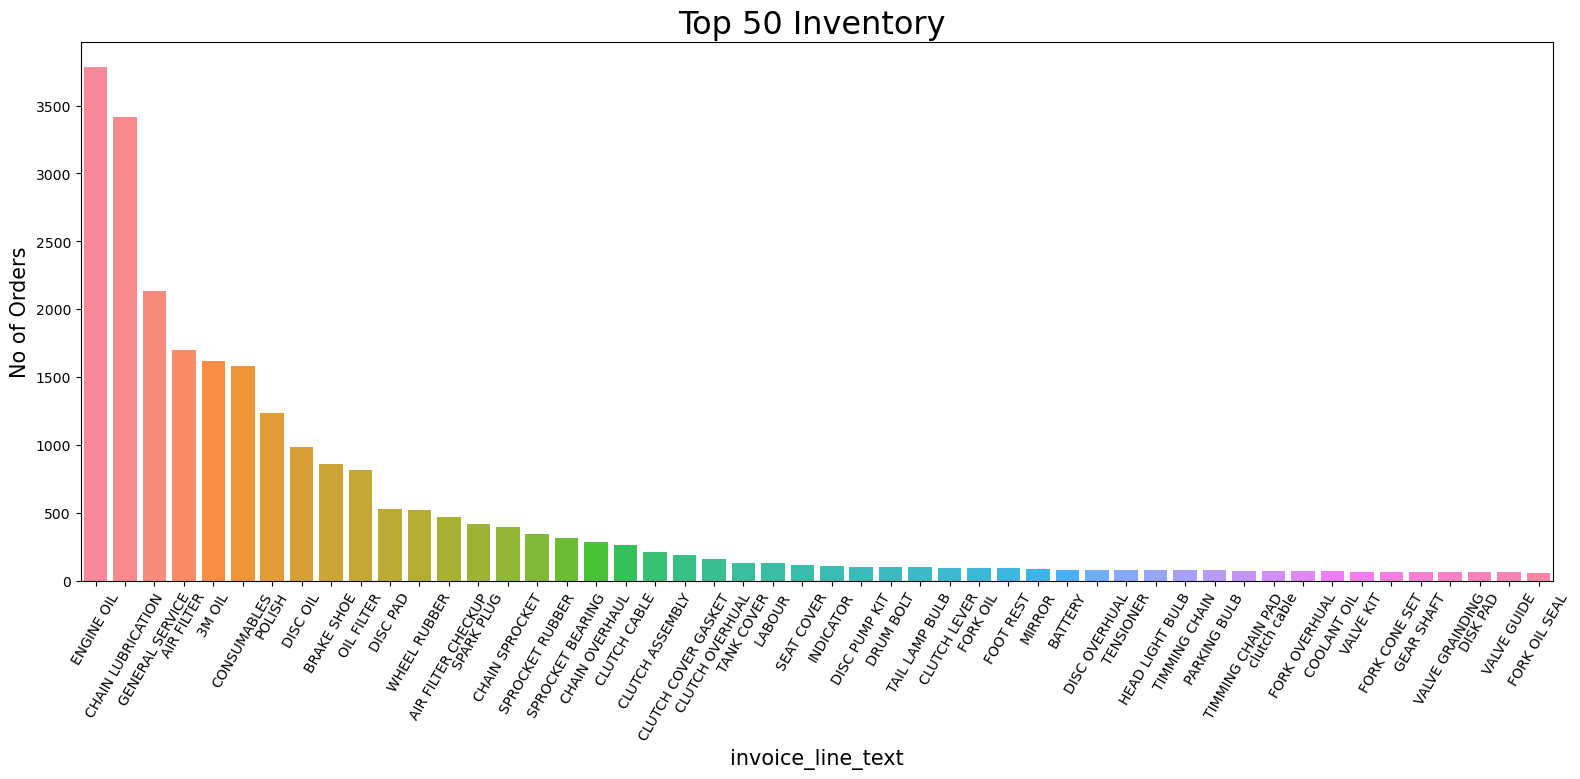

In [34]:
plt.figure(figsize=[19,7])
sns.countplot(x=df['invoice_line_text'],order=df['invoice_line_text'].value_counts().iloc[:50].index,saturation=15)
plt.xlabel("invoice_line_text",fontdict={'fontsize':15},color='black')
plt.ylabel('No of Orders',fontdict={'fontsize':15},color='black')
plt.xticks(rotation=60)
plt.title("Top 50 Inventory ",fontdict={'fontsize':23});

- We've observed that a significant number of products have been utilized less than 150 times over a span of three years. Consequently, even if we opt to exclude these products from our analysis, we can still efficiently handle our inventory.

## Filtering Spare parts having value counts over 150

In [35]:
spareparts= df.invoice_line_text.value_counts()
Filtered = spareparts[spareparts > 150]
len(Filtered)

22

In [36]:
print(Filtered)

ENGINE OIL             3782
CHAIN LUBRICATION      3417
GENERAL SERVICE        2132
AIR FILTER             1698
3M OIL                 1615
CONSUMABLES            1582
POLISH                 1236
DISC OIL                985
BRAKE SHOE              861
OIL FILTER              814
DISC PAD                530
WHEEL RUBBER            518
AIR FILTER CHECKUP      467
SPARK PLUG              414
CHAIN SPROCKET          394
SPROCKET RUBBER         344
SPROCKET BEARING        311
CHAIN OVERHAUL          283
CLUTCH CABLE            262
CLUTCH ASSEMBLY         209
CLUTCH COVER GASKET     187
CLUTCH OVERHUAL         162
Name: invoice_line_text, dtype: int64


In [37]:
df= df[df['invoice_line_text'].isin(list(Filtered.keys()))]

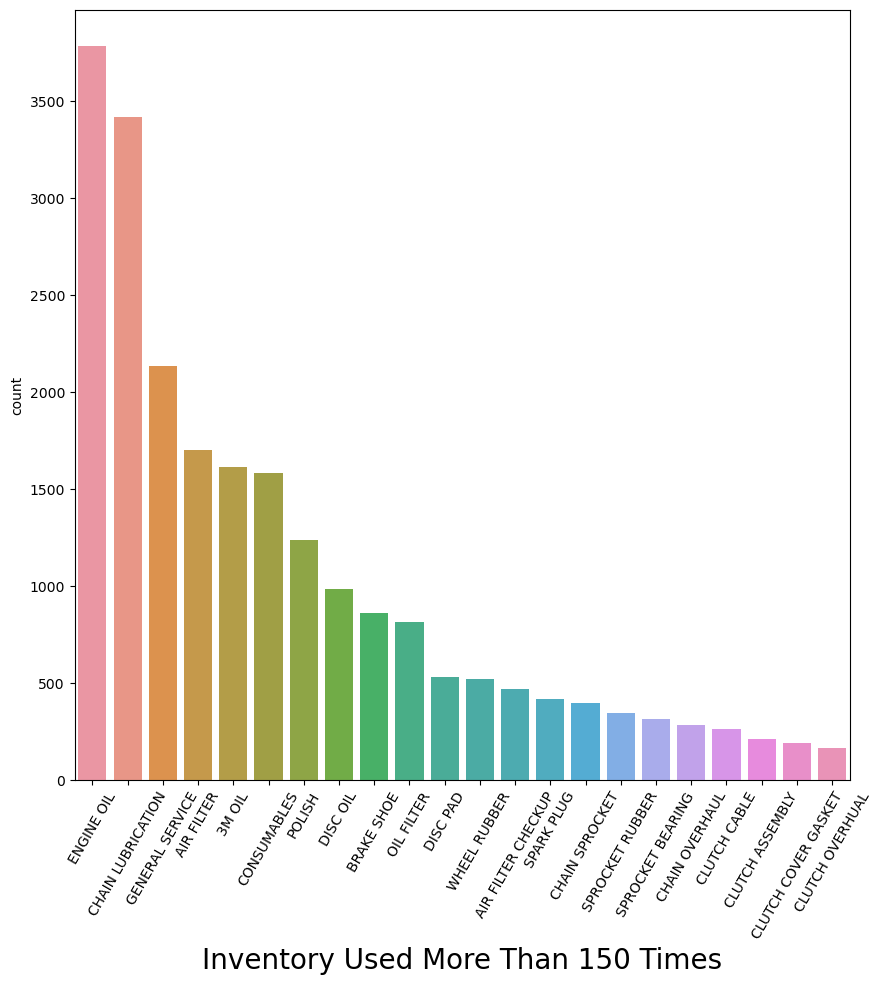

In [40]:
plt.figure(figsize=(10,10))
sns.countplot(x='invoice_line_text',data=df, order=df['invoice_line_text'].value_counts().index )
plt.xlabel('Inventory Used More Than 150 Times', fontsize=20)
plt.xticks(rotation=60, fontsize=10)
plt.yticks(fontsize=10)
plt.show()

### Count the value of each spare part and group them

In [41]:
data_invoice_count=df.groupby('invoice_line_text').count() 
data_invoice_count

invoice_date  job_card_date  business_partner_name  \
invoice_line_text                                                         
3M OIL                       1615           1615                   1615   
AIR FILTER                   1698           1698                   1698   
AIR FILTER CHECKUP            467            467                    467   
BRAKE SHOE                    861            861                    861   
CHAIN LUBRICATION            3417           3417                   3417   
CHAIN OVERHAUL                283            283                    283   
CHAIN SPROCKET                394            394                    394   
CLUTCH ASSEMBLY               209            209                    209   
CLUTCH CABLE                  262            262                    262   
CLUTCH COVER GASKET           187            187                    187   
CLUTCH OVERHUAL               162            162                    162   
CONSUMABLES                  1582           1582                   1582   
DISC OIL                      985            985                    985   
DISC PAD                      530            530                    530   
ENGINE OIL                   3782           3782                   3782   
GENERAL SERVICE              2132           2132                   2132   
OIL FILTER                    814            814                    814   
POLISH                       1236           1236                   1236   
SPARK PLUG                    414            414                    414   
SPROCKET BEARING              311            311                    311   
SPROCKET RUBBER               344            344                    344   
WHEEL RUBBER                  518            518                    518   

                     vehicle_no  vehicle_model  current_km_reading  State  
invoice_line_text                                                          
3M OIL                     1615           1615                1615   1615  
AIR FILTER                 1698           1698                1698   1698  
AIR FILTER CHECKUP          467            467                 467    467  
BRAKE SHOE                  861            861                 861    861  
CHAIN LUBRICATION          3417           3417                3417   3417  
CHAIN OVERHAUL              283            283                 283    283  
CHAIN SPROCKET              394            394                 394    394  
CLUTCH ASSEMBLY             209            209                 209    209  
CLUTCH CABLE                262            262                 262    262  
CLUTCH COVER GASKET         187            187                 187    187  
CLUTCH OVERHUAL             162            162                 162    162  
CONSUMABLES                1582           1582                1582   1582  
DISC OIL                    985            985                 985    985  
DISC PAD                    530            530                 530    530  
ENGINE OIL                 3782           3782                3782   3782  
GENERAL SERVICE            2132           2132                2132   2132  
OIL FILTER                  814            814                 814    814  
POLISH                     1236           1236                1236   1236  
SPARK PLUG                  414            414                 414    414  
SPROCKET BEARING            311            311                 311    311  
SPROCKET RUBBER             344            344                 344    344  
WHEEL RUBBER                518            518                 518    518

### **Create Orders on demand column in the DataFrame**

In [42]:
df.loc[df.invoice_line_text!=0,'Orders_on_Demand']=1
df

invoice_date job_card_date business_partner_name  vehicle_no  \
0         30-05-17      30-05-17        shivXXXXXXXXXX  KA03MFXXXX   
1         02-06-17      31-05-17        KIRAXXXXXXXXXX  KA53ESXXXX   
2         02-06-17      31-05-17        KIRAXXXXXXXXXX  KA53ESXXXX   
3         02-06-17      31-05-17        KIRAXXXXXXXXXX  KA53ESXXXX   
5         02-06-17      31-05-17        KIRAXXXXXXXXXX  KA53ESXXXX   
...            ...           ...                   ...         ...   
28477     06-01-19      06-01-19        pravXXXXXXXXXX  KA53EVXXXX   
28478     06-01-19      06-01-19        pravXXXXXXXXXX  KA53EVXXXX   
28479     06-01-19      06-01-19        pravXXXXXXXXXX  KA53EVXXXX   
28480     06-01-19      06-01-19        pravXXXXXXXXXX  KA53EVXXXX   
28481     06-01-19      06-01-19        pravXXXXXXXXXX  KA53EVXXXX   

                  vehicle_model current_km_reading  invoice_line_text State  \
0      BAJAJ AVENGER STREET 220              50000         ENGINE OIL    KA   
1           BAJAJ PULSAR NS 200                758         ENGINE OIL    KA   
2           BAJAJ PULSAR NS 200                758             POLISH    KA   
3           BAJAJ PULSAR NS 200                758        CONSUMABLES    KA   
5           BAJAJ PULSAR NS 200                758  CHAIN LUBRICATION    KA   
...                         ...                ...                ...   ...   
28477        BAJAJ DISCOVER 125              12805    SPROCKET RUBBER    KA   
28478        BAJAJ DISCOVER 125              12805       CLUTCH CABLE    KA   
28479        BAJAJ DISCOVER 125              12805         OIL FILTER    KA   
28480        BAJAJ DISCOVER 125              12805           DISC OIL    KA   
28481        BAJAJ DISCOVER 125              12805         AIR FILTER    KA   

       Orders_on_Demand  
0                   1.0  
1                   1.0  
2                   1.0  
3                   1.0  
5                   1.0  
...                 ...  
28477               1.0  
28478               1.0  
28479               1.0  
28480               1.0  
28481               1.0  

[22203 rows x 9 columns]

## Invoice Date 

In [43]:
df.invoice_date.unique()

array(['30-05-17', '02-06-17', '31-05-17', '03-06-17', '05-06-17',
       '01-06-17', '04-06-17', '08-06-17', '10-06-17', '06-06-17',
       '07-06-17', '09-06-17', '14-06-17', '13-06-17', '11-06-17',
       '12-06-17', '15-06-17', '16-06-17', '17-06-17', '18-06-17',
       '19-06-17', '20-06-17', '21-06-17', '22-06-17', '23-06-17',
       '24-06-17', '25-06-17', '26-06-17', '27-06-17', '28-06-17',
       '29-06-17', '30-06-17', '01-07-17', '03-07-17', '04-07-17',
       '05-07-17', '06-07-17', '07-07-17', '08-07-17', '10-07-17',
       '11-07-17', '12-07-17', '13-07-17', '14-07-17', '15-07-17',
       '17-07-17', '18-07-17', '19-07-17', '20-07-17', '21-07-17',
       '22-07-17', '24-07-17', '25-07-17', '26-07-17', '27-07-17',
       '28-07-17', '29-07-17', '31-07-17', '01-08-17', '02-08-17',
       '03-08-17', '04-08-17', '05-08-17', '07-08-17', '08-08-17',
       '09-08-17', '10-08-17', '11-08-17', '12-08-17', '14-08-17',
       '15-08-17', '16-08-17', '17-08-17', '18-08-17', '19-08-

In [44]:
df.invoice_date.value_counts()

01-12-18    128
04-12-18    112
06-10-18    110
16-10-18    108
05-09-18    103
           ... 
15-11-17      5
15-01-18      4
18-02-18      4
05-07-17      3
30-05-17      1
Name: invoice_date, Length: 554, dtype: int64

In [45]:
df['invoice_date']=pd.to_datetime(df['invoice_date'])


In [46]:
#day
df['invoiceDay']= pd.to_datetime(df["invoice_date"],format="%d/%m/%Y").dt.day
#month
df['invoicemonth']= pd.to_datetime(df["invoice_date"], format="%d/%m/%Y").dt.month
#year
df['invoiceyear']= pd.to_datetime(df["invoice_date"], format="%d/%m/%Y").dt.year
df['MonthYear'] = pd.to_datetime(df['invoice_date']).dt.strftime('%m-%Y')
#monthyear

In [47]:
df

invoice_date job_card_date business_partner_name  vehicle_no  \
0       2017-05-30      30-05-17        shivXXXXXXXXXX  KA03MFXXXX   
1       2017-02-06      31-05-17        KIRAXXXXXXXXXX  KA53ESXXXX   
2       2017-02-06      31-05-17        KIRAXXXXXXXXXX  KA53ESXXXX   
3       2017-02-06      31-05-17        KIRAXXXXXXXXXX  KA53ESXXXX   
5       2017-02-06      31-05-17        KIRAXXXXXXXXXX  KA53ESXXXX   
...            ...           ...                   ...         ...   
28477   2019-06-01      06-01-19        pravXXXXXXXXXX  KA53EVXXXX   
28478   2019-06-01      06-01-19        pravXXXXXXXXXX  KA53EVXXXX   
28479   2019-06-01      06-01-19        pravXXXXXXXXXX  KA53EVXXXX   
28480   2019-06-01      06-01-19        pravXXXXXXXXXX  KA53EVXXXX   
28481   2019-06-01      06-01-19        pravXXXXXXXXXX  KA53EVXXXX   

                  vehicle_model current_km_reading  invoice_line_text State  \
0      BAJAJ AVENGER STREET 220              50000         ENGINE OIL    KA   
1           BAJAJ PULSAR NS 200                758         ENGINE OIL    KA   
2           BAJAJ PULSAR NS 200                758             POLISH    KA   
3           BAJAJ PULSAR NS 200                758        CONSUMABLES    KA   
5           BAJAJ PULSAR NS 200                758  CHAIN LUBRICATION    KA   
...                         ...                ...                ...   ...   
28477        BAJAJ DISCOVER 125              12805    SPROCKET RUBBER    KA   
28478        BAJAJ DISCOVER 125              12805       CLUTCH CABLE    KA   
28479        BAJAJ DISCOVER 125              12805         OIL FILTER    KA   
28480        BAJAJ DISCOVER 125              12805           DISC OIL    KA   
28481        BAJAJ DISCOVER 125              12805         AIR FILTER    KA   

       Orders_on_Demand  invoiceDay  invoicemonth  invoiceyear MonthYear  
0                   1.0          30             5         2017   05-2017  
1                   1.0           6             2         2017   02-2017  
2                   1.0           6             2         2017   02-2017  
3                   1.0           6             2         2017   02-2017  
5                   1.0           6             2         2017   02-2017  
...                 ...         ...           ...          ...       ...  
28477               1.0           1             6         2019   06-2019  
28478               1.0           1             6         2019   06-2019  
28479               1.0           1             6         2019   06-2019  
28480               1.0           1             6         2019   06-2019  
28481               1.0           1             6         2019   06-2019  

[22203 rows x 13 columns]

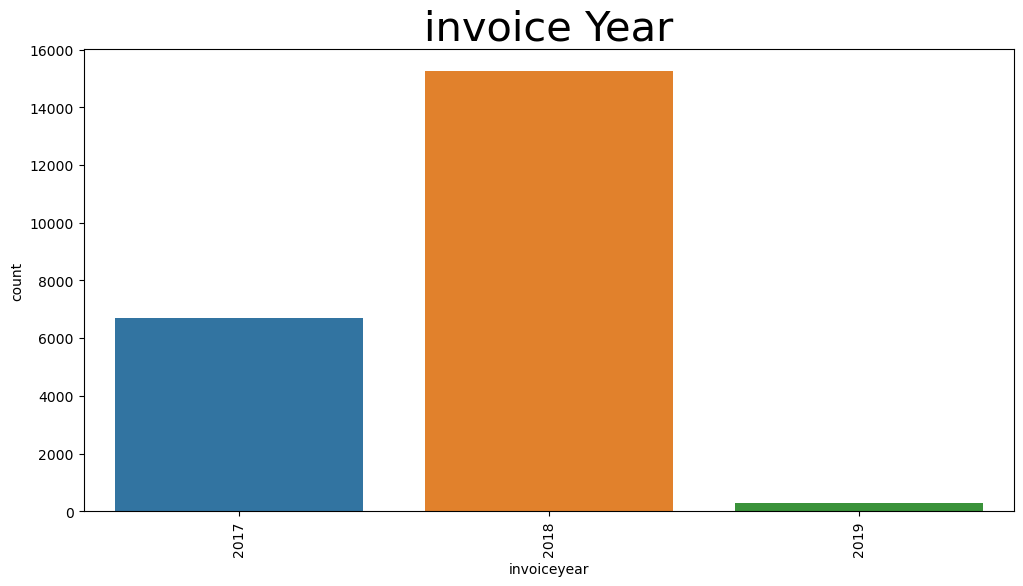

In [48]:

plt.figure(figsize=(12,6))
sns.countplot(df.invoiceyear,)
plt.title('invoice Year', size=30)
plt.xticks(rotation=90)
plt.show()

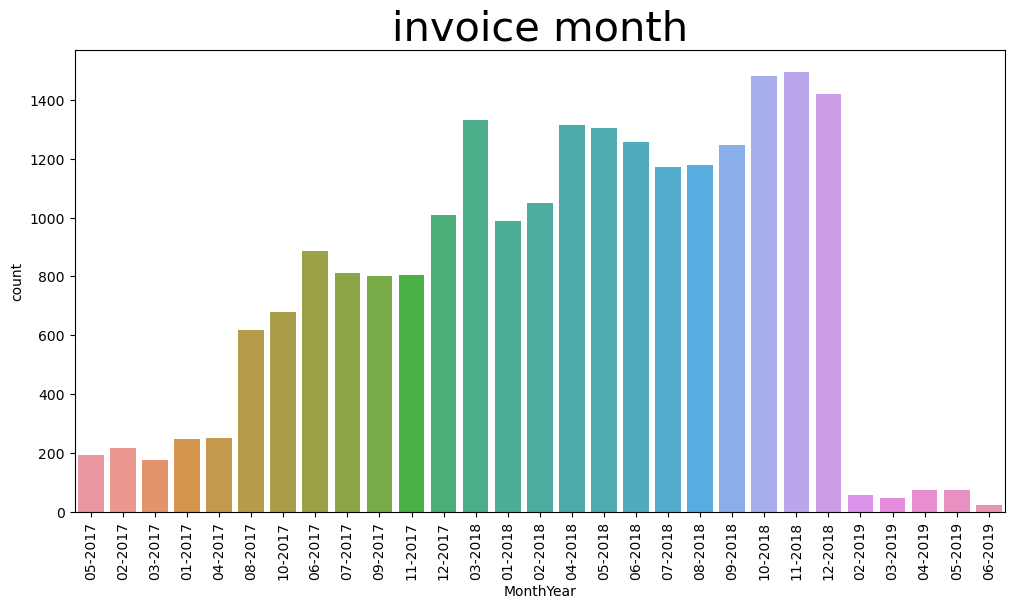

In [51]:

plt.figure(figsize=(12,6))
sns.countplot(df.MonthYear,)
plt.title('invoice month', size=30)
plt.xticks(rotation=90)
plt.show()

- Our data for the year 2019 is incomplete, and there are no entries available for January 2019.

In [53]:
data_invoice_date=df.groupby(['MonthYear']).count()
data_invoice_date

invoice_date  job_card_date  business_partner_name  vehicle_no  \
MonthYear                                                                   
01-2017             246            246                    246         246   
01-2018             989            989                    989         989   
02-2017             215            215                    215         215   
02-2018            1051           1051                   1051        1051   
02-2019              55             55                     55          55   
03-2017             176            176                    176         176   
03-2018            1332           1332                   1332        1332   
03-2019              45             45                     45          45   
04-2017             249            249                    249         249   
04-2018            1315           1315                   1315        1315   
04-2019              75             75                     75          75   
05-2017             192            192                    192         192   
05-2018            1306           1306                   1306        1306   
05-2019              74             74                     74          74   
06-2017             885            885                    885         885   
06-2018            1259           1259                   1259        1259   
06-2019              22             22                     22          22   
07-2017             811            811                    811         811   
07-2018            1173           1173                   1173        1173   
08-2017             617            617                    617         617   
08-2018            1178           1178                   1178        1178   
09-2017             800            800                    800         800   
09-2018            1248           1248                   1248        1248   
10-2017             678            678                    678         678   
10-2018            1481           1481                   1481        1481   
11-2017             804            804                    804         804   
11-2018            1497           1497                   1497        1497   
12-2017            1009           1009                   1009        1009   
12-2018            1421           1421                   1421        1421   

           vehicle_model  current_km_reading  invoice_line_text  State  \
MonthYear                                                                
01-2017              246                 246                246    246   
01-2018              989                 989                989    989   
02-2017              215                 215                215    215   
02-2018             1051                1051               1051   1051   
02-2019               55                  55                 55     55   
03-2017              176                 176                176    176   
03-2018             1332                1332               1332   1332   
03-2019               45                  45                 45     45   
04-2017              249                 249                249    249   
04-2018             1315                1315               1315   1315   
04-2019               75                  75                 75     75   
05-2017              192                 192                192    192   
05-2018             1306                1306               1306   1306   
05-2019               74                  74                 74     74   
06-2017              885                 885                885    885   
06-2018             1259                1259               1259   1259   
06-2019               22                  22                 22     22   
07-2017              811                 811                811    811   
07-2018             1173                1173               1173   1173   
08-2017              617                 617                617    61

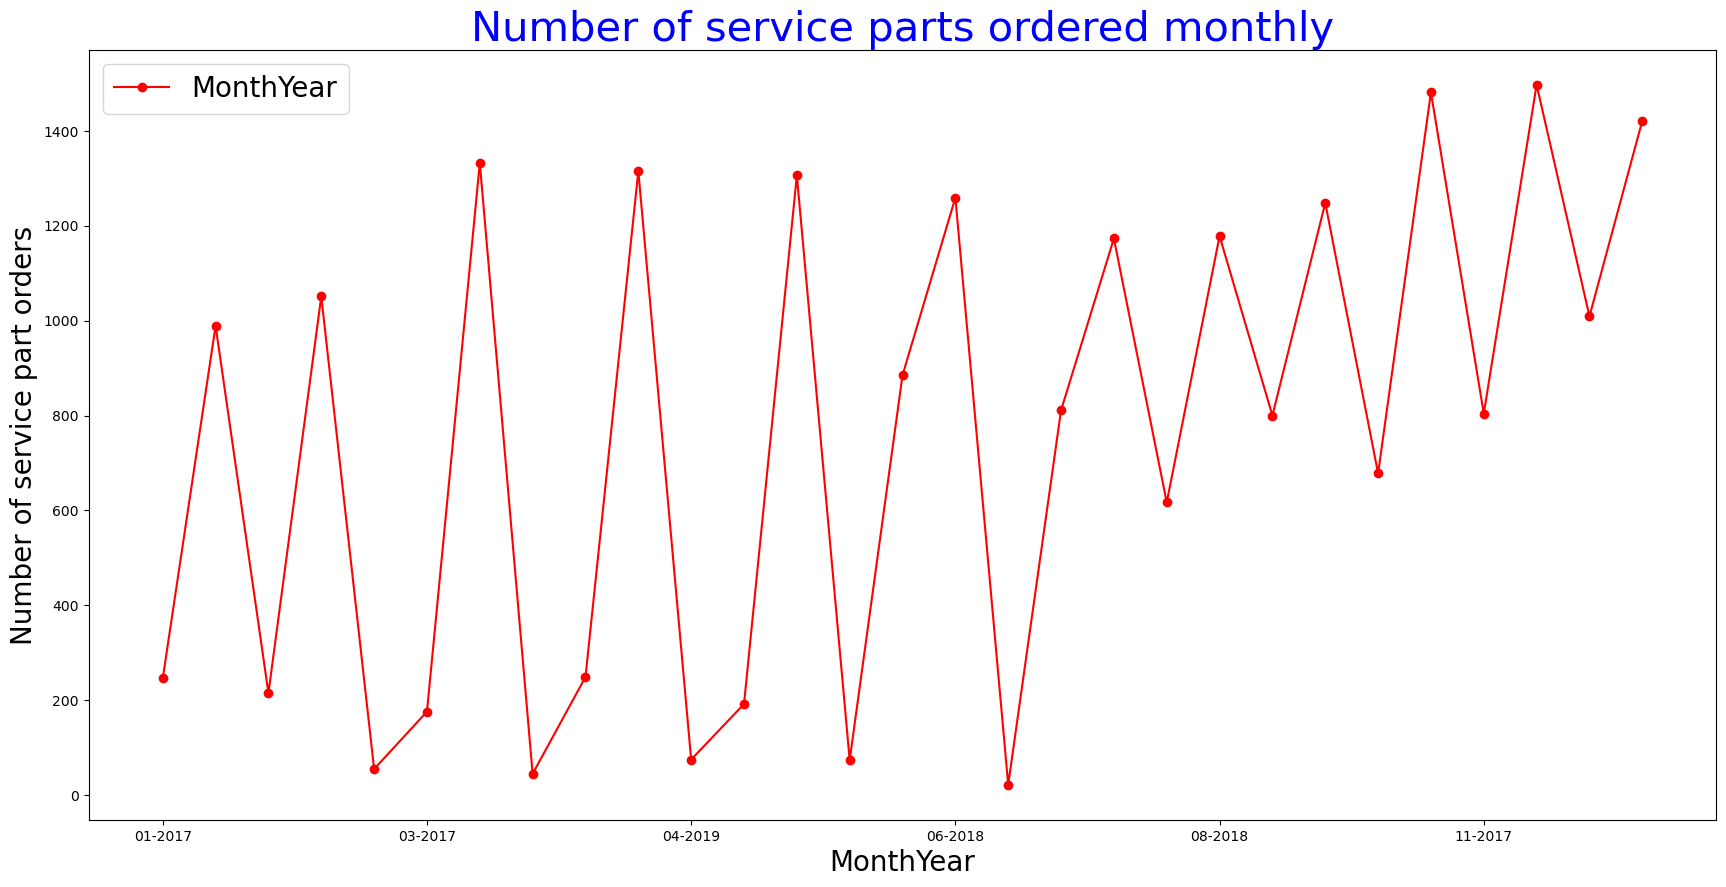

In [54]:
data_MonthYear=df.groupby(['MonthYear'])['MonthYear'].count().to_frame()
data_MonthYear.plot(kind='line',figsize=[21,10],color='red',marker='o')
plt.title("Number of service parts ordered monthly",fontdict={'fontsize':30,'color':'blue'},loc='center')
plt.ylabel("Number of service part orders",fontdict={'fontsize':20})
plt.xlabel("MonthYear",fontdict={'fontsize':20})
plt.legend(loc='upper left',frameon=True, labelspacing=1,fontsize=20)       

In [55]:
data_invoiceDay=df.groupby(['invoice_date'])['invoice_date'].count()
data_invoiceDay

invoice_date
2017-01-06    23
2017-01-07    67
2017-01-08    32
2017-01-09    42
2017-01-10    17
              ..
2019-02-01    55
2019-03-01    45
2019-04-01    75
2019-05-01    74
2019-06-01    22
Name: invoice_date, Length: 554, dtype: int64

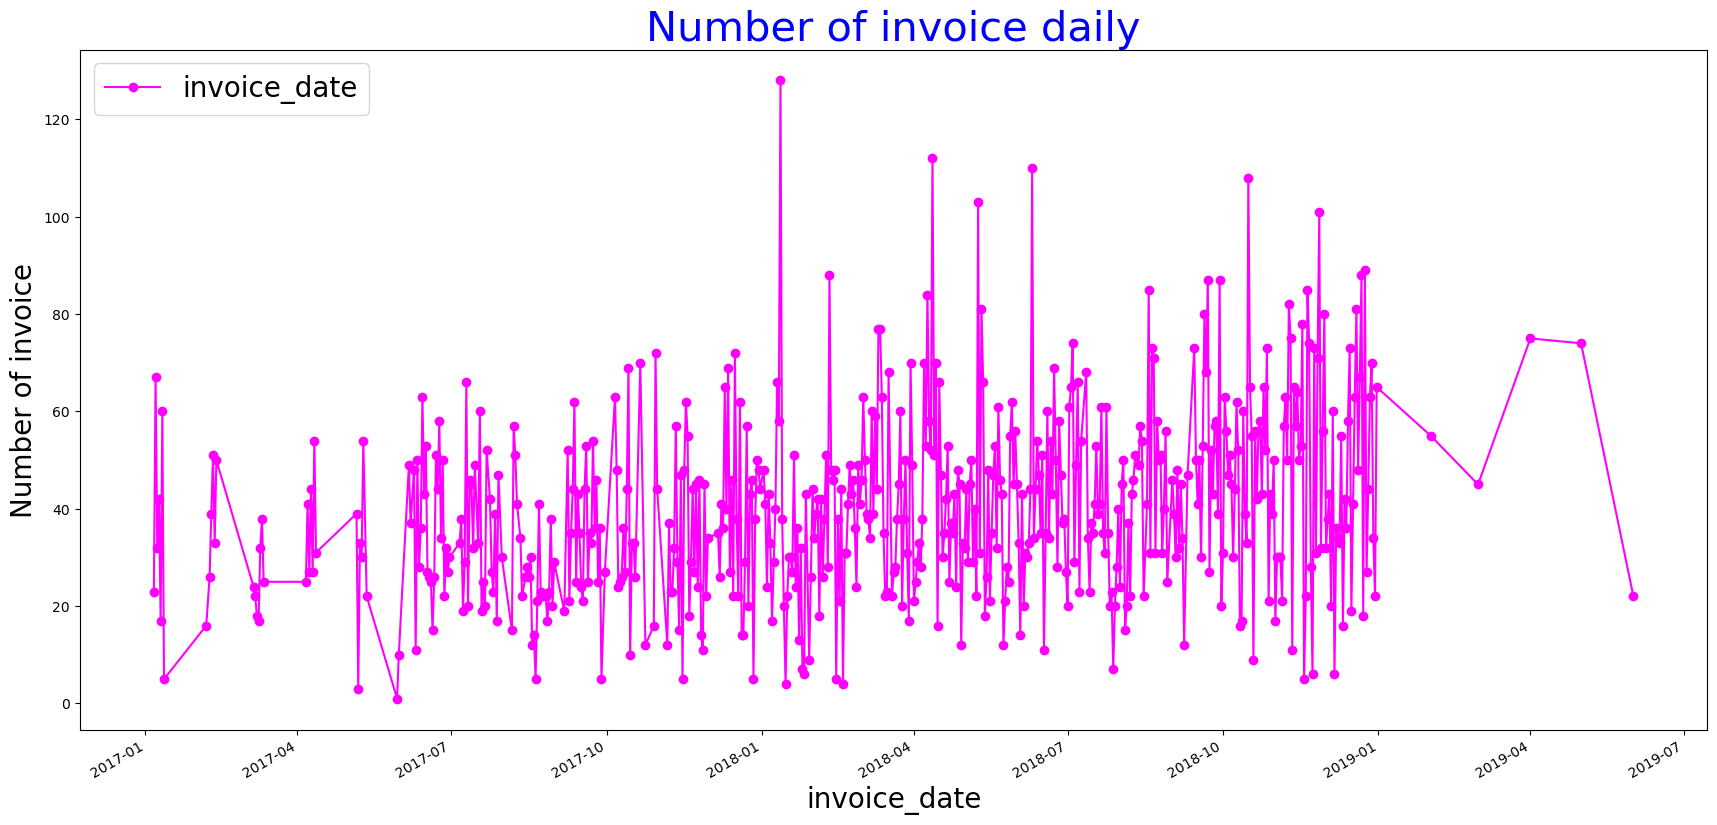

In [56]:
data_invoiceDay=df.groupby(['invoice_date'])['invoice_date'].count().to_frame()
data_invoiceDay.plot(kind='line',figsize=[21,10],color='magenta',marker='o')
plt.title("Number of invoice daily",fontdict={'fontsize':30,'color':'blue'},loc='center')
plt.ylabel("Number of invoice",fontdict={'fontsize':20})
plt.xlabel("invoice_date",fontdict={'fontsize':20})
plt.legend(loc='upper left',frameon=True, labelspacing=1,fontsize=20)       

## job_card_date

In [57]:
df.job_card_date.unique()

array(['30-05-17', '31-05-17', '01-06-17', '02-06-17', '03-06-17',
       '04-06-17', '05-06-17', '06-06-17', '07-06-17', '08-06-17',
       '09-06-17', '10-06-17', '11-06-17', '12-06-17', '13-06-17',
       '14-06-17', '15-06-17', '16-06-17', '17-06-17', '18-06-17',
       '19-06-17', '20-06-17', '21-06-17', '22-06-17', '23-06-17',
       '24-06-17', '25-06-17', '26-06-17', '27-06-17', '28-06-17',
       '29-06-17', '30-06-17', '01-07-17', '03-07-17', '04-07-17',
       '05-07-17', '06-07-17', '07-07-17', '08-07-17', '10-07-17',
       '11-07-17', '12-07-17', '13-07-17', '14-07-17', '15-07-17',
       '17-07-17', '18-07-17', '19-07-17', '20-07-17', '21-07-17',
       '22-07-17', '24-07-17', '25-07-17', '26-07-17', '27-07-17',
       '28-07-17', '29-07-17', '31-07-17', '01-08-17', '02-08-17',
       '03-08-17', '04-08-17', '05-08-17', '07-08-17', '08-08-17',
       '09-08-17', '10-08-17', '11-08-17', '12-08-17', '14-08-17',
       '15-08-17', '16-08-17', '17-08-17', '18-08-17', '19-08-

In [58]:
df.job_card_date.value_counts()

01-12-18    128
04-12-18    112
06-10-18    110
16-10-18    108
05-09-18    103
           ... 
20-08-17      5
18-02-18      4
15-01-18      4
05-07-17      3
30-05-17      1
Name: job_card_date, Length: 552, dtype: int64

In [59]:
df['job_card_date']=pd.to_datetime(df['job_card_date'])

In [60]:
data_job_card_date=df.groupby(['job_card_date']).count()
data_job_card_date

invoice_date  business_partner_name  vehicle_no  vehicle_model  \
job_card_date                                                                   
2017-01-06               26                     26          26             26   
2017-01-07               67                     67          67             67   
2017-01-08               32                     32          32             32   
2017-01-09               42                     42          42             42   
2017-01-10               17                     17          17             17   
...                     ...                    ...         ...            ...   
2019-02-01               55                     55          55             55   
2019-03-01               45                     45          45             45   
2019-04-01               75                     75          75             75   
2019-05-01               74                     74          74             74   
2019-06-01               22                     22          22             22   

               current_km_reading  invoice_line_text  State  Orders_on_Demand  \
job_card_date                                                                   
2017-01-06                     26                 26     26                26   
2017-01-07                     67                 67     67                67   
2017-01-08                     32                 32     32                32   
2017-01-09                     42                 42     42                42   
2017-01-10                     17                 17     17                17   
...                           ...                ...    ...               ...   
2019-02-01                     55                 55     55                55   
2019-03-01                     45                 45     45                45   
2019-04-01                     75                 75     75                75   
2019-05-01                     74                 74     74                74   
2019-06-01                     22                 22     22                22   

               invoiceDay  invoicemonth  invoiceyear  MonthYear  
job_card_date                                                    
2017-01-06             26            26           26         26  
2017-01-07             67            67           67         67  
2017-01-08             32            32           32         32  
2017-01-09             42            42           42         42  
2017-01-10             17            17           17         17  
...                   ...           ...          ...        ...  
2019-02-01             55            55           55         55  
2019-03-01             45            45           45         45  
2019-04-01             75            75           75         75  
2019-05-01             74            74           74         74  
2019-06-01             22            22           22         22  

[552 rows x 12 columns]

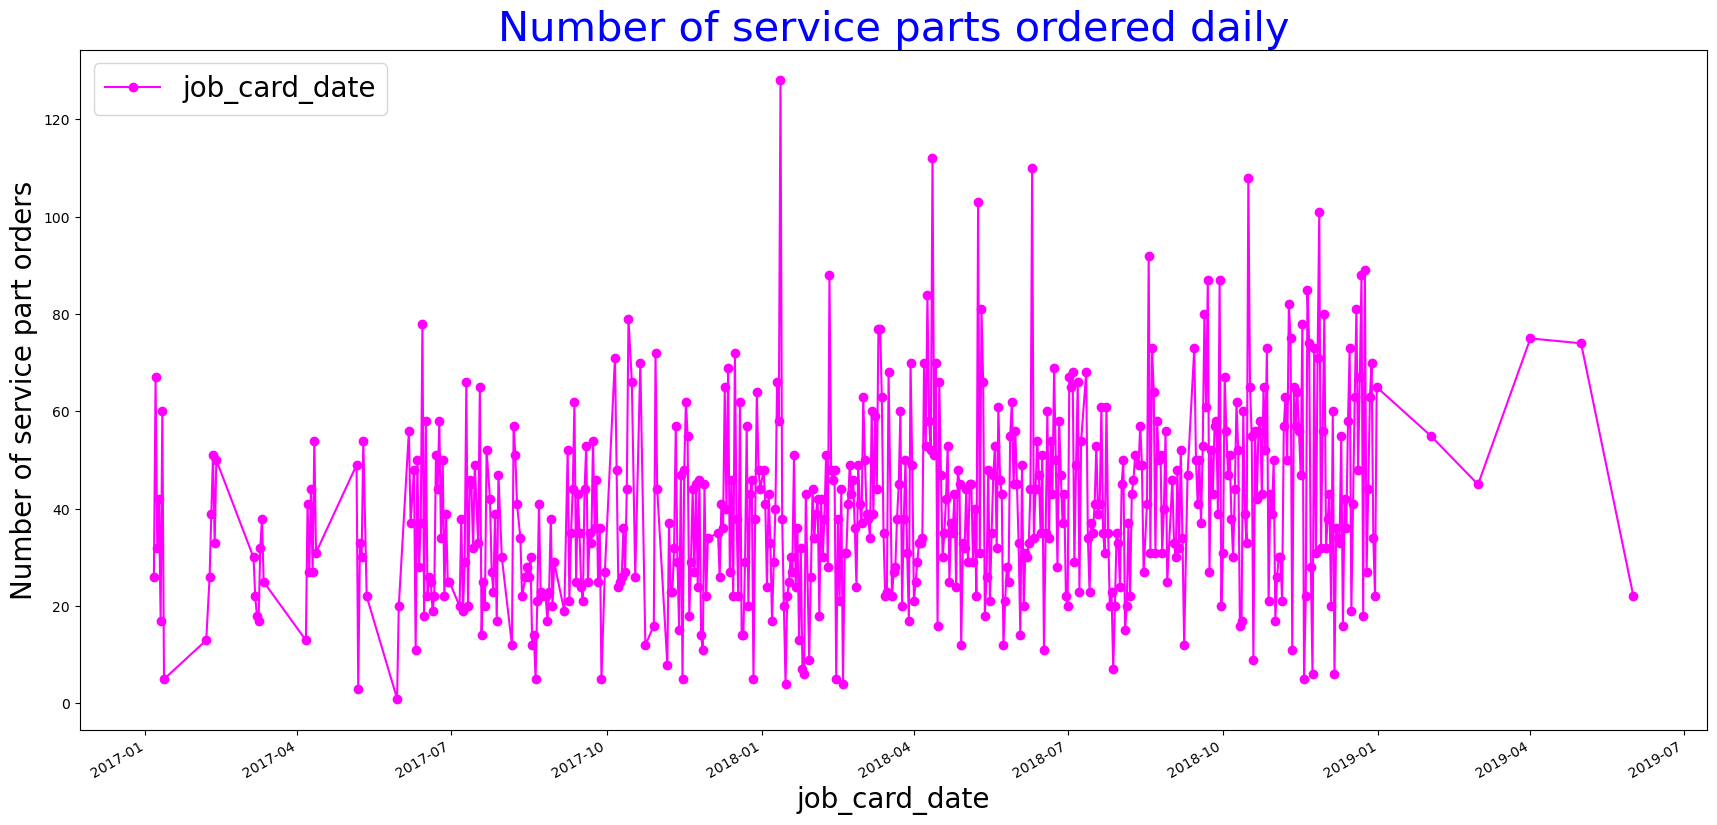

In [61]:
data_job_card_date=df.groupby(['job_card_date'])['job_card_date'].count().to_frame()
data_job_card_date.plot(kind='line',figsize=[21,10],color='magenta',marker='o')
plt.title("Number of service parts ordered daily",fontdict={'fontsize':30,'color':'blue'},loc='center')
plt.ylabel("Number of service part orders",fontdict={'fontsize':20})
plt.xlabel("job_card_date",fontdict={'fontsize':20})
plt.legend(loc='upper left',frameon=True, labelspacing=1,fontsize=20)       

- The Maximum number of service parts orders are in 2018-01 to 2018-02.
- The Minimum number of service parts orders are in between 2017-07 to 2017-09.

## Km Reading

In [62]:
df.current_km_reading.value_counts()

0        340
500       79
20000     50
600       37
700       37
        ... 
18096      1
2525       1
19729      1
40929      1
474        1
Name: current_km_reading, Length: 3428, dtype: int64

In [63]:
df.current_km_reading.unique()

array(['50000', '758', '3717', ..., '2914', '3425', '12805'], dtype=object)

- The maximum current_km_reading is **610000**.
- The minimum current_km_reading is **0**.

### Vehicle model vs invoice line text

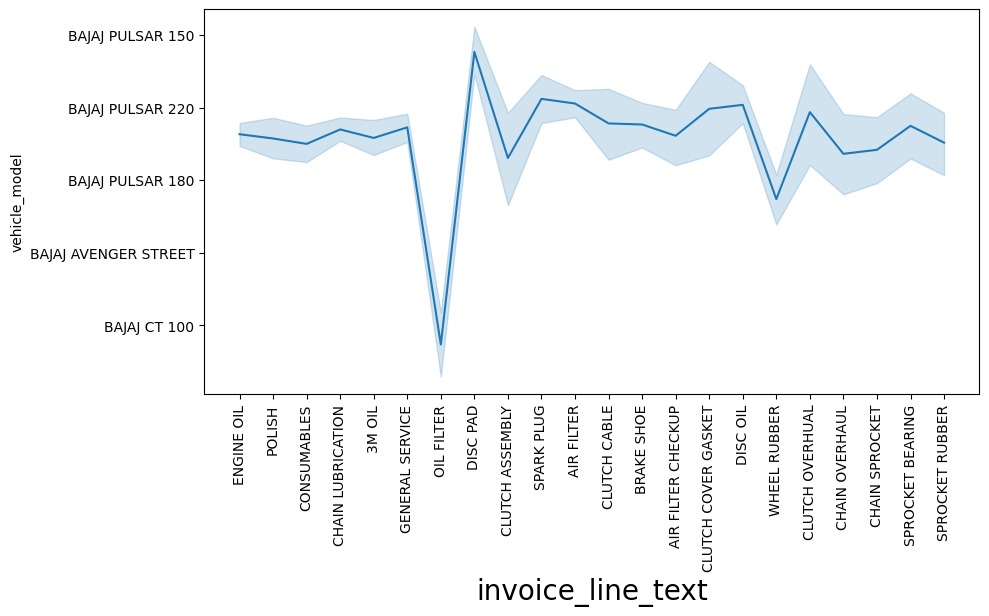

In [64]:

plt.figure(figsize=(10,5))
sns.lineplot(x=df.invoice_line_text,y=df.vehicle_model)
plt.xlabel('invoice_line_text', fontsize=20)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.show()

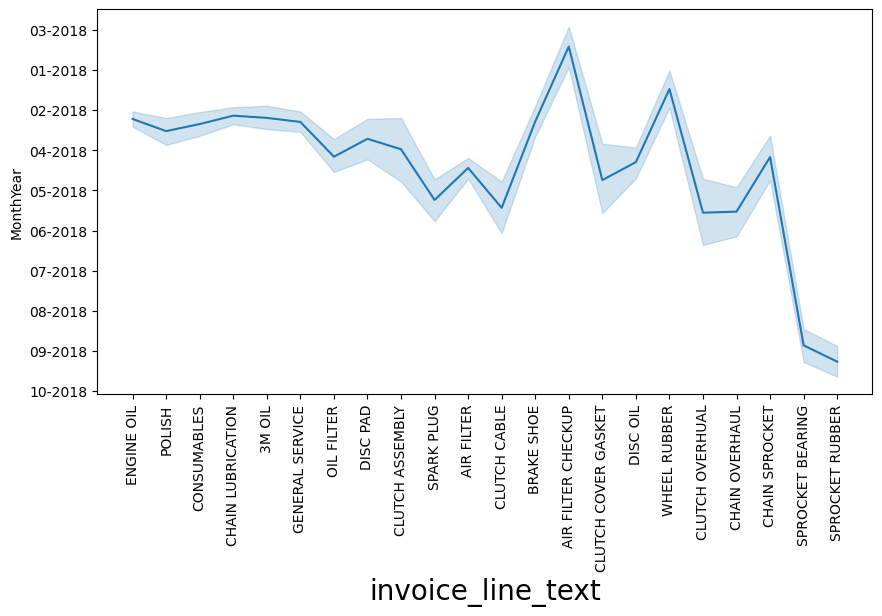

In [65]:
custom_month_order = [
    '2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06', 
    '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12',
    '2018-01', '2018-02', '2018-03', '2018-04', '2018-05', '2018-06', 
    '2018-07', '2018-08', '2018-09', '2018-10', '2018-11', '2018-12',
    '2019-01', '2019-02', '2019-03', '2019-04', '2019-05', '2019-06'
]
plt.figure(figsize=(10,5))
sns.lineplot(x=df.invoice_line_text,y=df.MonthYear)
plt.xlabel('invoice_line_text', fontsize=20)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.show()

<Figure size 5000x5000 with 0 Axes>

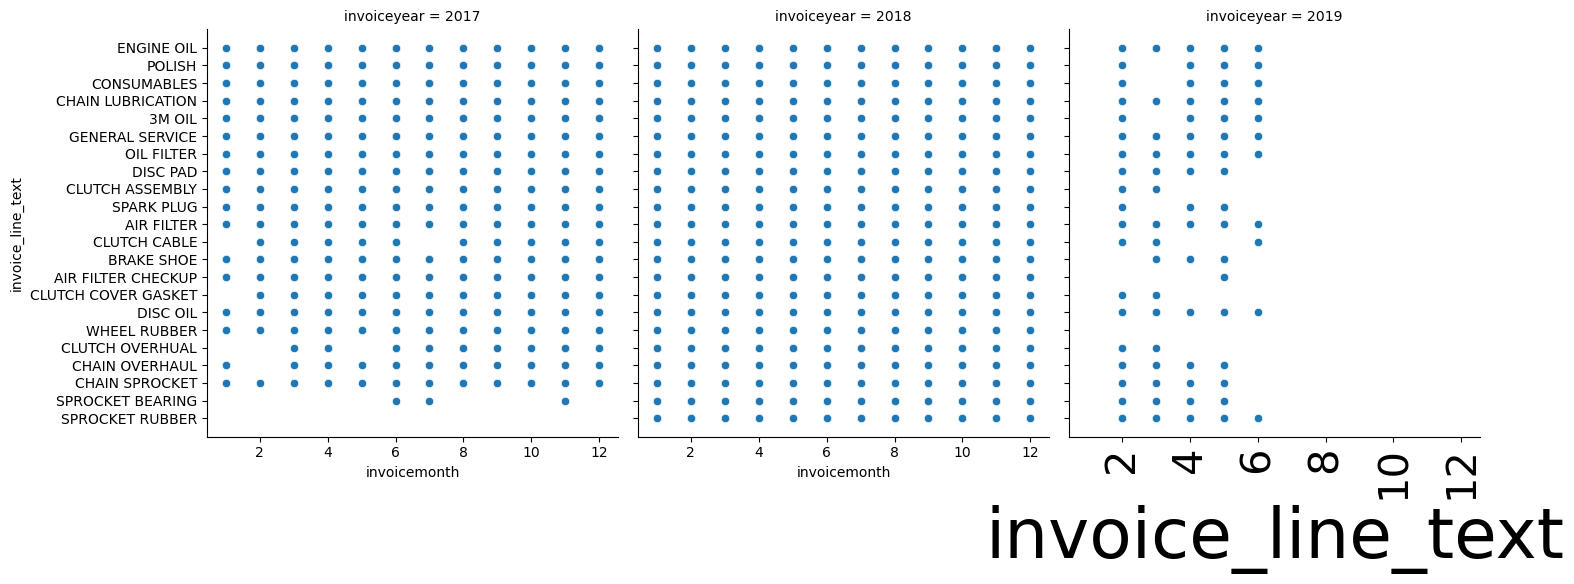

In [66]:
plt.figure(figsize=(50,50))
sns.relplot(y=df.invoice_line_text,x=df.invoicemonth,col=df.invoiceyear)
plt.xlabel('invoice_line_text', fontsize=50)
plt.xticks(rotation=90, fontsize=30)
plt.yticks(fontsize=50)
plt.show()

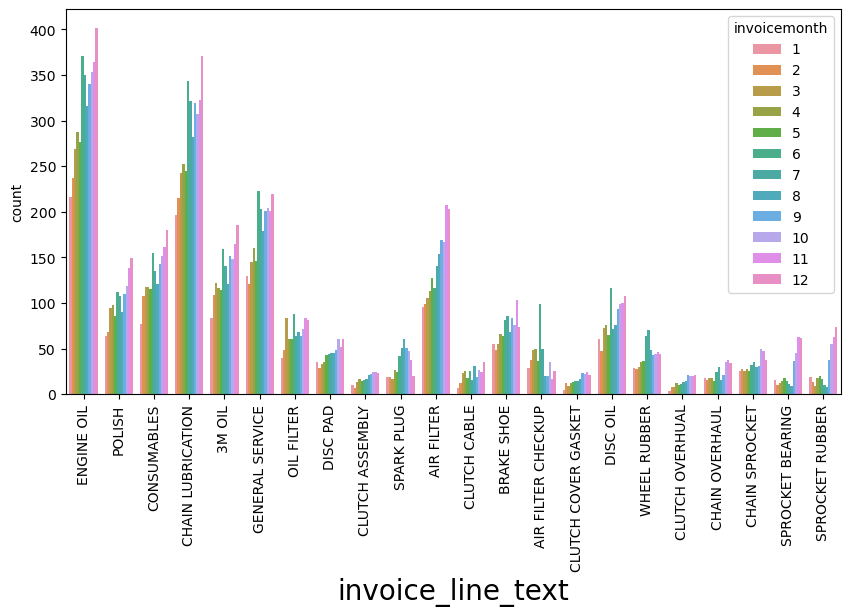

In [67]:
plt.figure(figsize=(10,5))
sns.countplot(x=df.invoice_line_text,hue=df.invoicemonth)
plt.xlabel('invoice_line_text', fontsize=20)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [68]:
df.head(50)


invoice_date job_card_date business_partner_name  vehicle_no  \
0    2017-05-30    2017-05-30        shivXXXXXXXXXX  KA03MFXXXX   
1    2017-02-06    2017-05-31        KIRAXXXXXXXXXX  KA53ESXXXX   
2    2017-02-06    2017-05-31        KIRAXXXXXXXXXX  KA53ESXXXX   
3    2017-02-06    2017-05-31        KIRAXXXXXXXXXX  KA53ESXXXX   
5    2017-02-06    2017-05-31        KIRAXXXXXXXXXX  KA53ESXXXX   
7    2017-05-31    2017-05-31        pattXXXXXXXXXX  KA53EMXXXX   
8    2017-05-31    2017-05-31        pattXXXXXXXXXX  KA53EMXXXX   
9    2017-05-31    2017-05-31        pattXXXXXXXXXX  KA53EMXXXX   
10   2017-05-31    2017-05-31        diliXXXXXXXXXX  KA53S3XXXX   
11   2017-05-31    2017-05-31        diliXXXXXXXXXX  KA53S3XXXX   
12   2017-05-31    2017-05-31        diliXXXXXXXXXX  KA53S3XXXX   
13   2017-05-31    2017-05-31        diliXXXXXXXXXX  KA53S3XXXX   
14   2017-05-31    2017-05-31        VENKXXXXXXXXXX  KA53ERXXXX   
15   2017-05-31    2017-05-31        VENKXXXXXXXXXX  KA53ERXXXX   
16   2017-05-31    2017-05-31        VENKXXXXXXXXXX  KA53ERXXXX   
24   2017-03-06    2017-05-31        MAYAXXXXXXXXXX  KA05JGXXXX   
30   2017-03-06    2017-05-31        MAYAXXXXXXXXXX  KA05JGXXXX   
31   2017-03-06    2017-05-31        MAYAXXXXXXXXXX  KA05JGXXXX   
33   2017-03-06    2017-05-31        MAYAXXXXXXXXXX  KA05JGXXXX   
36   2017-03-06    2017-05-31        MAYAXXXXXXXXXX  KA05JGXXXX   
38   2017-03-06    2017-05-31        MAYAXXXXXXXXXX  KA05JGXXXX   
42   2017-05-06    2017-01-06        srivXXXXXXXXXX  KA02EWXXXX   
45   2017-01-06    2017-01-06        ANMOXXXXXXXXXX  KA53EQXXXX   
46   2017-01-06    2017-01-06        ANMOXXXXXXXXXX  KA53EQXXXX   
47   2017-01-06    2017-01-06        ANMOXXXXXXXXXX  KA53EQXXXX   
48   2017-01-06    2017-01-06        ANMOXXXXXXXXXX  KA53EQXXXX   
49   2017-01-06    2017-01-06        ANMOXXXXXXXXXX  KA53EQXXXX   
50   2017-01-06    2017-01-06        PRASXXXXXXXXXX  KA53ERXXXX   
51   2017-01-06    2017-01-06        PRASXXXXXXXXXX  KA53ERXXXX   
52   2017-01-06    2017-01-06        PRASXXXXXXXXXX  KA53ERXXXX   
55   2017-01-06    2017-01-06        PRASXXXXXXXXXX  KA53ERXXXX   
56   2017-01-06    2017-01-06        SATHXXXXXXXXXX  KA53ESXXXX   
57   2017-01-06    2017-01-06        SATHXXXXXXXXXX  KA53ESXXXX   
58   2017-01-06    2017-01-06        SATHXXXXXXXXXX  KA53ESXXXX   
59   2017-01-06    2017-01-06        vinoXXXXXXXXXX  KA51EVXXXX   
60   2017-01-06    2017-01-06        vinoXXXXXXXXXX  KA51EVXXXX   
62   2017-01-06    2017-01-06        vinoXXXXXXXXXX  KA51EVXXXX   
63   2017-01-06    2017-01-06        diliXXXXXXXXXX  ka 53 XXXX   
64   2017-01-06    2017-01-06        diliXXXXXXXXXX  ka 53 XXXX   
65   2017-01-06    2017-01-06        madhXXXXXXXXXX  KA03JJXXXX   
66   2017-01-06    2017-01-06        madhXXXXXXXXXX  KA03JJXXXX   
67   2017-01-06    2017-01-06        madhXXXXXXXXXX  KA03JJXXXX   
68   2017-01-06    2017-01-06        madhXXXXXXXXXX  KA03JJXXXX   
69   2017-01-06    2017-01-06        shivXXXXXXXXXX  KA53V3XXXX   
70   2017-01-06    2017-01-06        diliXXXXXXXXXX  KA53S9XXXX   
73   2017-02-06    2017-01-06        pratXXXXXXXXXX  KA44K6XXXX   
74   2017-02-06    2017-01-06        pratXXXXXXXXXX  KA44K6XXXX   
90   2017-02-06    2017-02-06        maliXXXXXXXXXX  KA53ERXXXX   
91   2017-02-06    2017-02-06        maliXXXXXXXXXX  KA53ERXXXX   
93   2017-02-06    2017-02-06        maliXXXXXXXXXX  KA53ERXXXX   

               vehicle_model current_km_reading    invoice_line_text State  \
0   BAJAJ AVENGER STREET 220              50000           ENGINE OIL    KA   
1        BAJAJ PULSAR NS 200                758           ENGINE OIL    KA   
2        BAJAJ PULSAR NS 200                758               POLISH    KA   
3        BAJAJ PULSAR NS 200                758          CONSUMABLES    KA   
5        BAJAJ PULSAR NS 200                758    CHAIN LUBRICATION    KA   
7              BAJAJ PLATINA               3717           ENGINE OIL    KA   
8              BAJAJ PLATINA           

### **Creating a new Dataframe containing Invoice Line Text and Orders on Demand**

In [69]:
data_new=df.groupby(df.job_card_date).sum()
data_new

Orders_on_Demand  invoiceDay  invoicemonth  invoiceyear
job_card_date                                                         
2017-01-06                 26.0         156            32        52442
2017-01-07                 67.0         469            67       135139
2017-01-08                 32.0         256            32        64544
2017-01-09                 42.0         378            42        84714
2017-01-10                 17.0         170            17        34289
...                         ...         ...           ...          ...
2019-02-01                 55.0          55           110       111045
2019-03-01                 45.0          45           135        90855
2019-04-01                 75.0          75           300       151425
2019-05-01                 74.0          74           370       149406
2019-06-01                 22.0          22           132        44418

[552 rows x 4 columns]

In [70]:
data_new.drop(['invoiceDay','invoicemonth','invoiceyear',],axis=1,inplace=True)

In [71]:
data_new

Orders_on_Demand
job_card_date                  
2017-01-06                 26.0
2017-01-07                 67.0
2017-01-08                 32.0
2017-01-09                 42.0
2017-01-10                 17.0
...                         ...
2019-02-01                 55.0
2019-03-01                 45.0
2019-04-01                 75.0
2019-05-01                 74.0
2019-06-01                 22.0

[552 rows x 1 columns]

In [72]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 552 entries, 2017-01-06 to 2019-06-01
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Orders_on_Demand  552 non-null    float64
dtypes: float64(1)
memory usage: 8.6 KB


### **Timeseries Forecasting**

Text(0.5, 0, 'Job Card Date')

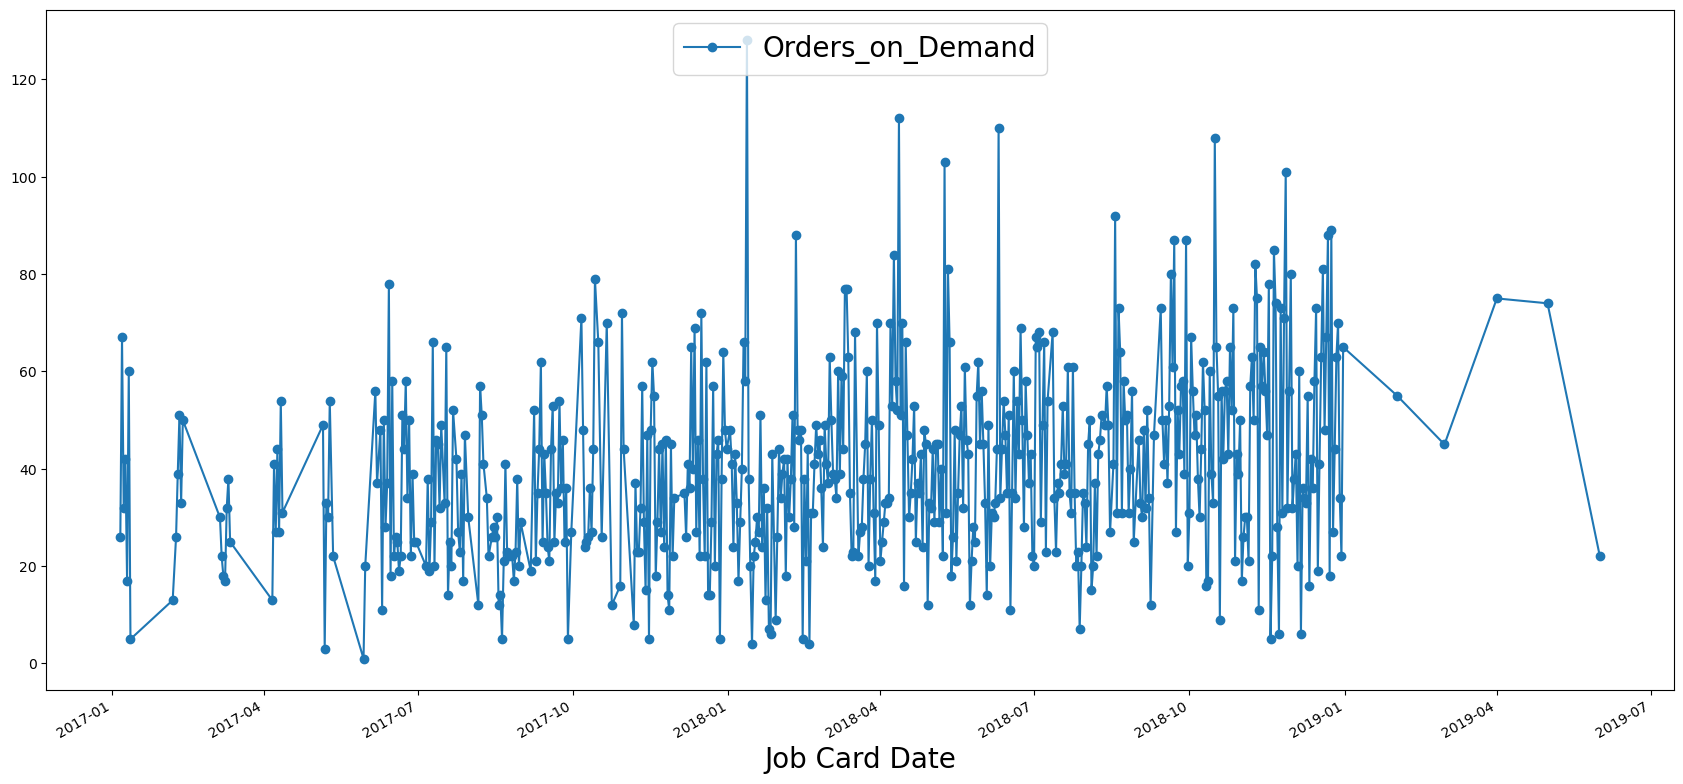

In [73]:
data_new.plot(figsize=(21,10),marker='o')
plt.legend(loc='upper center',frameon=True, labelspacing=1,fontsize=20)
plt.xlabel(xlabel='Job Card Date',fontdict={'fontsize':20})

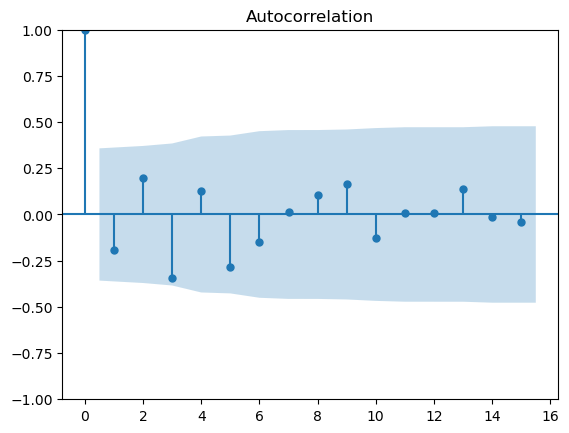

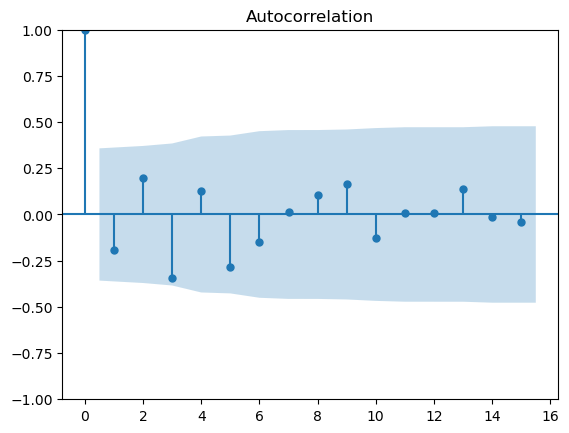

In [74]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data_new.iloc[:30,:]) # inside iloc :30 means selecting Job Card Date values and : means selecting all the values from Orders on demand


In [75]:
!pip install statsmodels

In [76]:
from statsmodels.graphics.tsaplots import plot_pacf

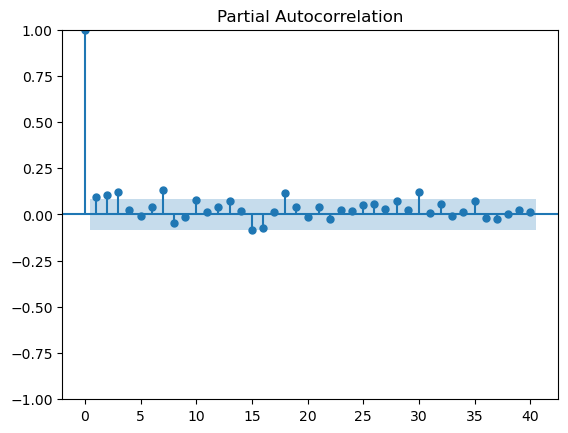

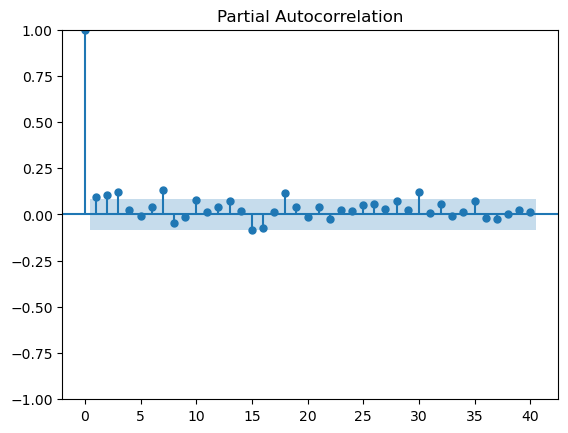

In [77]:
import statsmodels.api as sm
sm.graphics.tsa.plot_pacf(data_new.values.squeeze(), lags=40, method="ywm")


### **Converting to Stationary**

In [78]:
data_diff=data_new.diff(periods=1)

In [79]:
data_diff=data_diff[1:]
data_diff.head()

Orders_on_Demand
job_card_date                  
2017-01-07                 41.0
2017-01-08                -35.0
2017-01-09                 10.0
2017-01-10                -25.0
2017-01-11                 43.0

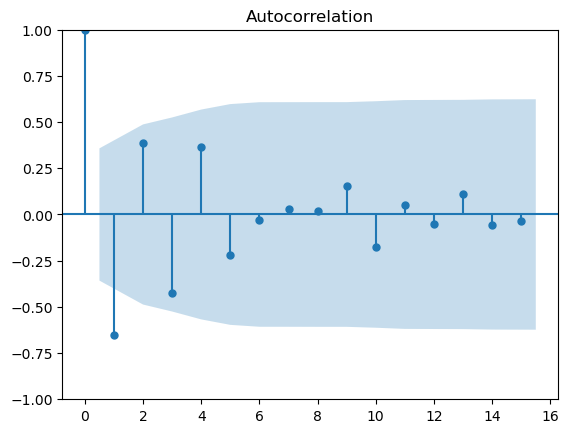

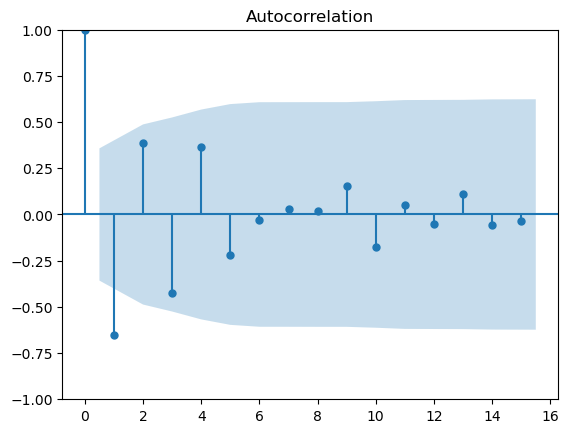

In [80]:
plot_acf(data_diff.iloc[:30,:])

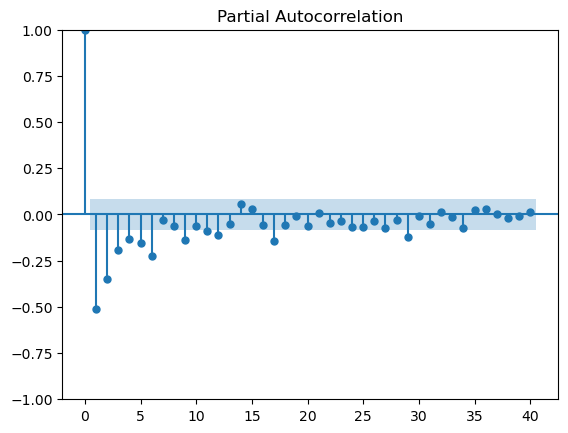

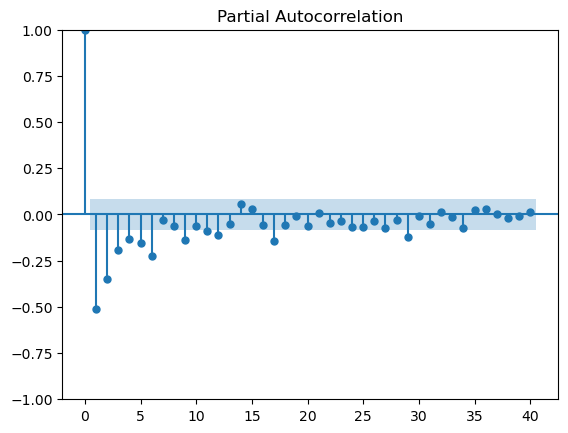

In [81]:
import statsmodels.api as sm
sm.graphics.tsa.plot_pacf(data_diff.values.squeeze(), lags=40, method="ywm")

Text(0.5, 0, 'Job Card Date')

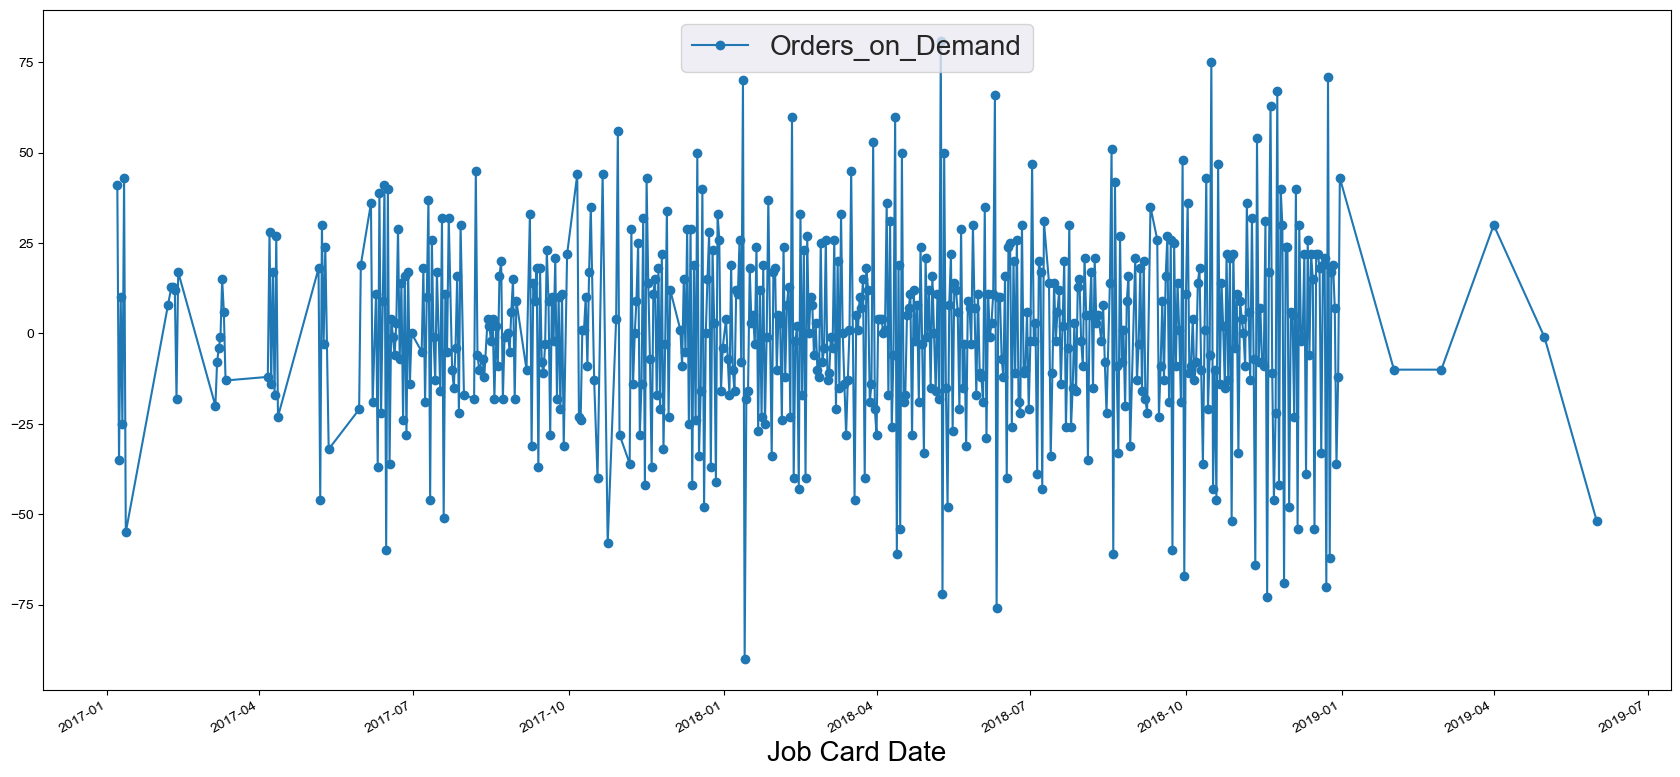

In [82]:
data_diff.plot(figsize=(21,10),marker='o')
sns.set_style("darkgrid")
plt.legend(loc='upper center',frameon=True, labelspacing=1,fontsize=20)
plt.xlabel(xlabel='Job Card Date',fontdict={'fontsize':20})

In [83]:
data_diff.shape

(551, 1)

## **Model Creation**


### **AutoRegressive(AR) Model**


In [84]:
X=data_diff.values
train=X[0:450]
test=X[450:]
predictions=[]

In [85]:
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
model_ar=AutoReg(train, lags=200)
model_ar_fit=model_ar.fit()
print(model_ar_fit.aic) #  Akaike Information Criteria

2254.7677097215856


In [86]:
predictions_ar=model_ar_fit.predict(start=50,end=150)
predictions_ar

array([  5.29841164,  10.60086637, -14.48670255,   4.2891372 ,
        -5.28303543,  15.59275706, -22.39135663,  23.45945902,
         4.26198938, -29.93446058,  23.74518341,  -1.30943802,
         1.76472506, -10.69419204,   7.80103391,  -1.97327403,
        -0.31377624,  25.21080504,  -6.66636843,  72.2569817 ,
       -44.04552935,  38.58592912, -11.4027391 , -47.43954229,
         2.70324519,  10.60240824, -22.40545026,   3.46538726,
        10.63951331,  -1.19670838, -17.4128709 ,  38.15850899,
       -25.12257615, -12.2892134 , -30.4260945 ,  10.26530629,
         3.29428025,  -8.42345026,  17.87114593,   8.41638224,
       -36.33609359,  15.23534504,  -2.71311635, -13.15479789,
        -5.68913214,  30.93348615, -21.0253967 ,  18.19496992,
        -6.69392652,   9.14170432,  12.27485451,  53.25738664,
       -76.15975142,  12.36459939,   6.99332822, -16.574228  ,
        -7.82048308,   9.44106821, -36.91990653,  29.56294168,
         6.59901675, -20.62814728,  18.63301576,  -4.27

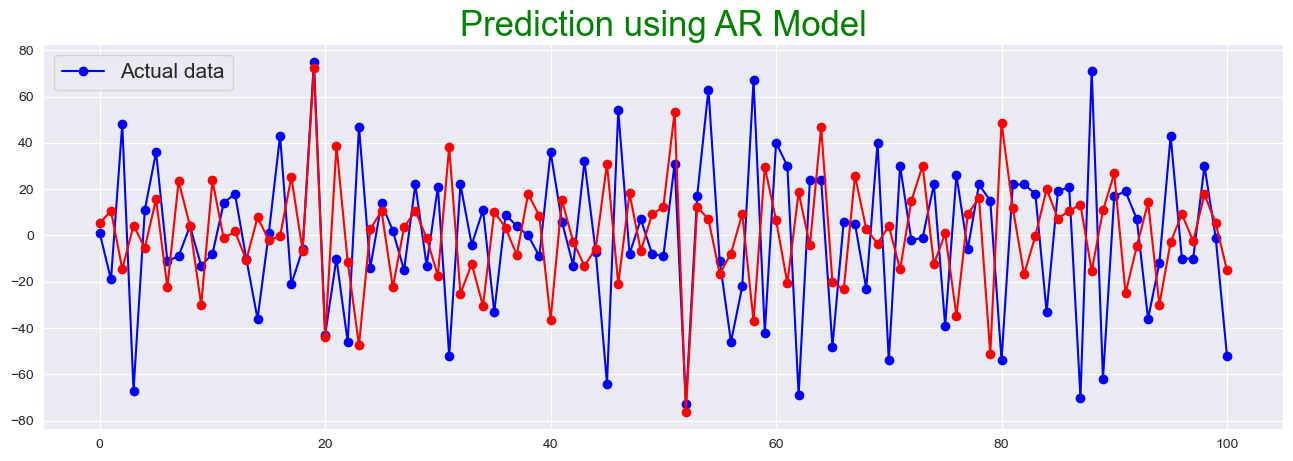

In [87]:
plt.figure(figsize=(16,5))
sns.set_style("darkgrid")
plt.plot(test,color='blue',label='Actual data',marker='o')
plt.legend(loc='upper left',frameon=True,fontsize=15)
plt.title('Prediction using AR Model',fontdict={'fontsize':25},color='green')
plt.plot(predictions_ar,color='red',label="Predicted data",marker='o')
plt.show()

In [88]:
mse_ar = mean_squared_error(test,predictions_ar)
mse_ar

1731.8423248606991

In [89]:
print("Shape of test array:", test.shape)
print("Shape of predictions_ar array:", predictions_ar.shape)


Shape of test array: (101, 1)
Shape of predictions_ar array: (101,)


In [90]:
rmse_ar = np.sqrt(mean_squared_error(test,predictions_ar))
rmse_ar

41.61540970434749

- From the above Auto Regressive (AR) model Mean Squared Error is 1731.84 and the Root Mean Squared Error is 41.61

### **Auto Regressive Integrated Moving Average (ARIMA) Model**

In [91]:
X=data_diff.values
train=X[0:450]
test=X[450:]
predictions=[]

In [92]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')
# p - periods taken for autoregressive , d - integrated order of difference , q - periods in moving average
model_arima=ARIMA(train,order=(2,1,0))
model_arima_fit=model_arima.fit()
print(model_arima_fit.aic) #  Akaike Information Criteria

4227.210398138622


In [93]:
predictions_arima=model_arima_fit.predict(start=50,end=150)
predictions_arima

array([ -2.84531191,  17.18439589,  10.67653856,   4.86385592,
        -6.15530335,  -2.69741983,  -7.2776701 ,  -4.87889425,
         1.40781759,  -7.01872874,  -3.46148179,   7.78294437,
        -1.17092589,  -6.2436883 ,  26.81172958,  -6.32204678,
       -10.0376422 ,  13.52384934,  -8.15748695,   2.97693513,
        -1.10858941,  10.94135393, -10.86567005, -20.36328725,
         1.59359708,  14.76421564,  11.96893966, -12.91382972,
       -10.60675975,   7.38149285,  -4.70295543,   5.22784996,
         7.37457365, -20.35753645,  14.71639436,  20.58203441,
        -8.06636528,  -8.32472244, -10.14201809,  -4.19091563,
         3.21782456,  -0.20327829,   1.89820719,  -7.52474087,
        -7.85072431,  -4.44693553,   2.87652592,  19.66368382,
         0.89436312,  -9.84546558,  -0.28944857,  -2.91382972,
        -0.10474535,  11.84731078,  -2.15019829,  -4.10908148,
        -2.12731815,  13.66242282,   0.07506861,  -9.06547374,
        11.17744562,  15.85133958, -11.04004054,  -9.28

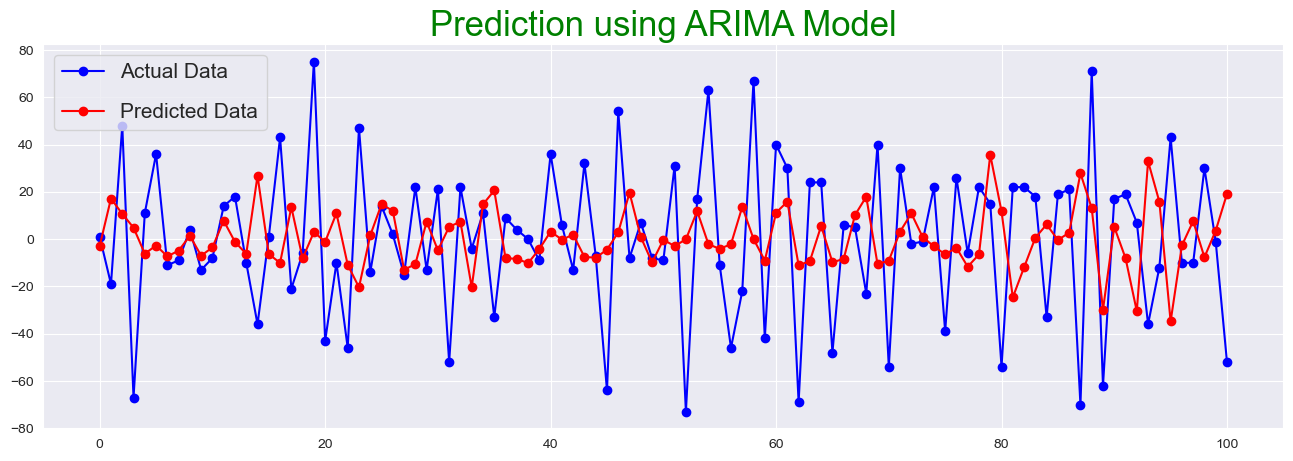

In [94]:
plt.figure(figsize=(16,5))
plt.plot(test,color='Blue',label='Actual Data',marker='o')
plt.plot(predictions_arima, color='Red',label='Predicted Data',marker='o')
plt.legend(loc='upper left',frameon=True, labelspacing=1,fontsize=15)
plt.title('Prediction using ARIMA Model',fontdict={'fontsize':25},color='green')
plt.show()

In [95]:
mse_arima = mean_squared_error(test,predictions_arima)
mse_arima

1325.8800572076782

In [96]:
rmse_arima = np.sqrt(mean_squared_error(test,predictions_arima))
rmse_arima

36.41263595522409

In [97]:
import itertools
p=d=q=range(0,5)
pdq=list(itertools.product(p,d,q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 2, 4),
 (1, 3, 0),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (1, 3, 4),
 (1, 4, 0),
 (1, 4, 1),
 (1, 4, 2),
 (1, 4, 3),
 (1, 4, 4),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2),
 (2, 2, 3),
 (2, 2, 4),
 (2, 3, 0),
 (2, 3, 1),
 (2, 3, 2),
 (2, 3, 3),
 (2, 3, 4),
 (2, 4, 0),
 (2, 4, 1),
 (2, 4, 2),
 (2, 4, 3),
 (2, 4, 4),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 0, 4),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3,

- From the above Auto Regressive Integrated Moving Average (ARIMA) Model the Mean Squared Error is 1325.88 and the Root Mean Squared Error is 36.41.

### **Seasonal Autoregressive Integrated Moving Average (SARIMA) Model**


In [98]:
X=data_diff.values
train=X[0:450]
test=X[450:]
predictions=[]

In [99]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error


In [100]:
from seaborn.regression import statsmodels
model_sarima=SARIMAX(test,order=(1, 1, 1),seasonal_order=(1,1,1,12))
model_sarima_fit=model_sarima.fit()
print(model_sarima_fit.aic)

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.08468D+00    |proj g|=  1.06645D+00

At iterate    5    f=  4.44736D+00    |proj g|=  4.19136D-02

At iterate   10    f=  4.34706D+00    |proj g|=  8.10461D-03

At iterate   15    f=  4.31227D+00    |proj g|=  9.35125D-03

At iterate   20    f=  4.31079D+00    |proj g|=  1.92136D-03

At iterate   25    f=  4.31065D+00    |proj g|=  1.08611D-04

At iterate   30    f=  4.31063D+00    |proj g|=  3.82409D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

In [101]:
predictions_sarima=model_sarima_fit.predict(start=50,end=150)
predictions_sarima

array([  6.9552873 , -16.15096103,   2.49333827,  52.23133494,
       -10.48636143, -24.10637272,   6.12814154,  10.42261259,
        -7.5000756 , -31.55350284,  31.61638142, -18.73740535,
        -9.88660487,  18.87579449,   8.91199626,   6.92895685,
        23.32374185,   7.88268396,  -2.018707  , -15.17103697,
       -31.10381646,  35.89263037, -10.43973332,  -2.61587181,
         1.05259296, -20.4807598 ,  21.88969784,  -3.04462256,
        19.24005494,   2.98800051, -17.14648285,  -5.43108453,
        -5.09672043,  -5.98868587,   1.0440169 ,  28.05308054,
       -23.2036777 , -17.74142548,  47.01758802, -36.64742168,
        41.02931029,   2.48890681, -19.2508513 , -24.4492    ,
        15.12950888,   7.55149327,  -8.98870237,  13.76279888,
        -4.60117335, -22.87037111,   8.11030442,  32.48576141,
        -4.9262352 ,  16.55893425, -29.32083635,  -1.35102163,
         7.84671682,   0.10972598,   4.71879433,   6.30863405,
        -7.74093604, -18.37957987,  28.97679866, -17.60

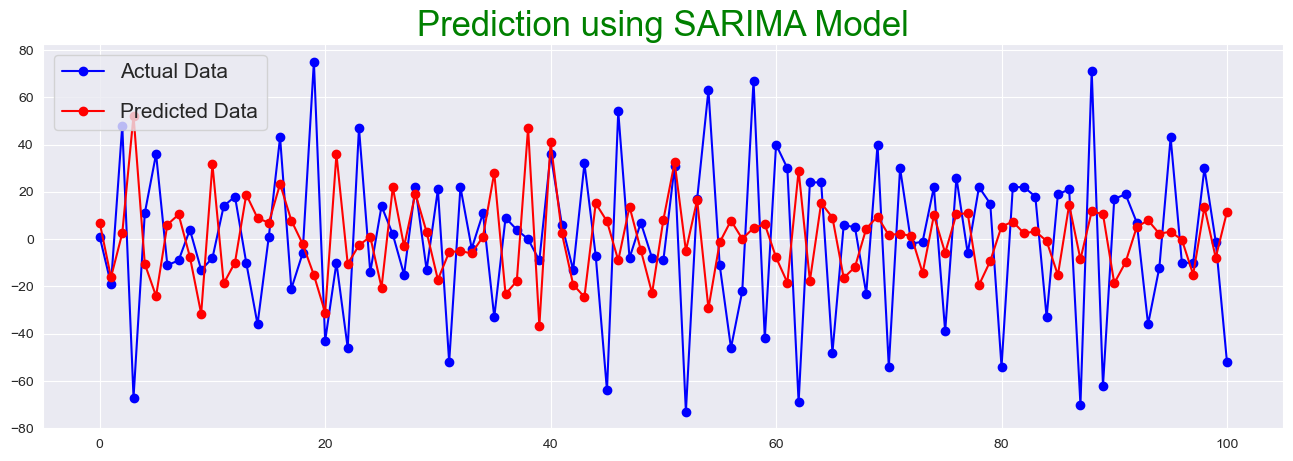

In [102]:
plt.figure(figsize=(16,5))
plt.plot(test,color='Blue',label='Actual Data',marker='o')
plt.plot(predictions_sarima, color='Red',label='Predicted Data',marker='o')
plt.legend(loc='upper left',frameon=True, labelspacing=1,fontsize=15)
plt.title('Prediction using SARIMA Model',fontdict={'fontsize':25},color='green')
plt.show()

In [103]:
mse_sarima = mean_squared_error(test,predictions_sarima)
mse_sarima

1526.8428568290028

In [104]:
rmse_sarima = np.sqrt(mean_squared_error(test,predictions_sarima))
rmse_sarima

39.07483661935137

In [105]:
import itertools
p=d=q=s=range(0,2)
pdqs=list(itertools.product(p,d,q,s))
pdqs

[(0, 0, 0, 0),
 (0, 0, 0, 1),
 (0, 0, 1, 0),
 (0, 0, 1, 1),
 (0, 1, 0, 0),
 (0, 1, 0, 1),
 (0, 1, 1, 0),
 (0, 1, 1, 1),
 (1, 0, 0, 0),
 (1, 0, 0, 1),
 (1, 0, 1, 0),
 (1, 0, 1, 1),
 (1, 1, 0, 0),
 (1, 1, 0, 1),
 (1, 1, 1, 0),
 (1, 1, 1, 1)]

- From the above Seasonal Autoregressive Integrated Moving Average (SARIMA) Model, the Mean Squared Error is 1526.84 and Root Mean Squared Error is 39.07

### **Seasonal Autoregressive Integrated Moving-Average with Exogenous Regressors (SARIMAX)**

In [106]:
X=data_diff.values
train=X[0:400]
test=X[400:]
predictions=[]

In [107]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

In [108]:
model_sarimax = SARIMAX(train,exdog=test,order=(3,2,2), seasonal_order=(1,1,1,12))
model_sarimax_fit = model_sarimax.fit()
print(model_sarimax_fit.aic)

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.01218D+00    |proj g|=  3.61121D-01

At iterate    5    f=  4.70799D+00    |proj g|=  3.50107D-02

At iterate   10    f=  4.67240D+00    |proj g|=  2.78267D-02

At iterate   15    f=  4.56359D+00    |proj g|=  1.31309D-01

At iterate   20    f=  4.34246D+00    |proj g|=  4.00429D-02

At iterate   25    f=  4.33799D+00    |proj g|=  1.81774D-03

At iterate   30    f=  4.33558D+00    |proj g|=  2.07893D-02

At iterate   35    f=  4.33469D+00    |proj g|=  1.21361D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


3483.7453778242516


In [109]:
predictions_sarimax=model_sarimax_fit.predict(start=50,end=200)
predictions_sarimax

array([-20.28190359, -25.89514056,   1.6486096 ,  27.51461073,
       -12.2348433 ,  17.03846068, -13.35275659,   6.61798364,
         9.26534156,  -1.87937423,  -4.4201654 ,  -0.66818326,
        -0.70176825, -35.64676681,  18.92718629,  -0.50372177,
       -13.57879223,   2.98434489, -13.11229006,   7.08854697,
       -11.09995751,  28.12084035,  11.33967493,  -0.63163118,
       -11.36388345, -19.99494929,  15.15265864,  14.78703954,
       -20.04525122,   8.6843489 , -24.65833391,   9.57712733,
         9.29731934, -26.8041327 ,  -7.8252549 ,   3.50988915,
        21.47284181,  -0.48146622,   2.8954845 ,   2.6444092 ,
       -13.76755505,   0.7880589 ,   3.23201131,   0.54657649,
        13.34714043, -10.18810625, -17.99424973,  -3.79082961,
         5.74668014, -10.56521407,   3.8227588 ,  -0.16992174,
       -21.64943518,   3.17311187, -10.0690594 ,   3.02803706,
       -15.87960065,  16.60028127,   0.33261723,  -9.79688042,
       -14.65083924,   6.81243201,   2.56945512,  12.99

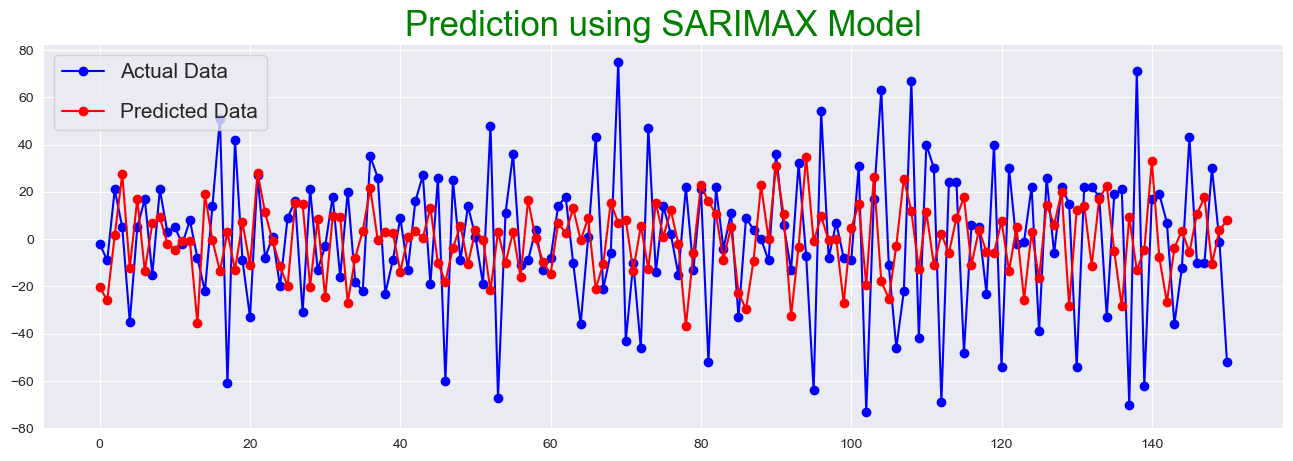

In [110]:
plt.figure(figsize=(16,5))
plt.plot(test,color='Blue',label='Actual Data',marker='o')
plt.plot(predictions_sarimax, color='Red',label='Predicted Data',marker='o')
plt.legend(loc='upper left',frameon=True, labelspacing=1,fontsize=15)
plt.title('Prediction using SARIMAX Model',fontdict={'fontsize':25},color='green')
plt.show()

In [111]:
mse_sarimax = mean_squared_error(test,predictions_sarimax)
mse_sarimax

1162.8802424935623

In [112]:
rmse_sarimax = np.sqrt(mean_squared_error(test,predictions_sarimax))
rmse_sarimax

34.10102993303226

- From the above Seasonal Autoregressive Integrated Moving-Average with Exogenous Regressors (SARIMAX) model , The Mean Squared Error is 1162.88 and the Root Mean Squared Error is 34.10

### **MODEL EVALUATION :**

In [113]:
models=pd.DataFrame({"models":["model_ar","model_arima","model_sarima","model_sarimax"],
                    "Mean Squared Error":[mse_ar,mse_arima,mse_sarima,mse_sarimax],
                     "Root Mean Squared Error":[rmse_ar,rmse_arima,rmse_sarima,rmse_sarimax]})
models.sort_values(by='Mean Squared Error',ascending=1)

models  Mean Squared Error  Root Mean Squared Error
3  model_sarimax         1162.880242                34.101030
1    model_arima         1325.880057                36.412636
2   model_sarima         1526.842857                39.074837
0       model_ar         1731.842325                41.615410

### **REPORT SUMMARY:**


Model SARIMAX: This model has the lowest MSE (1162.880) and RMSE (34.101) among all the models. Lower MSE and RMSE values indicate that this model's predictions are the closest to the true values on average. Therefore, Model SARIMAX appears to be the best-performing model in terms of accuracy.

Model ARIMA: While Model ARIMA has a higher MSE (1325.880) and RMSE (36.413) compared to Model SARIMAX, it still performs relatively well. It has the second-lowest MSE and RMSE values, indicating that its predictions are reasonably accurate.

Model SARIMA: Model SARIMA has a higher MSE (1526.843) and RMSE (39.075) than both Model SARIMAX and Model ARIMA. This suggests that its predictions are less accurate on average compared to the other two models. However, it is still a viable choice, depending on the specific requirements of your application.

Model AR: Model AR has the highest MSE (1731.842) and RMSE (41.615) among all the models. This indicates that its predictions have the largest errors on average, making it the least accurate model in this comparison.


## Conclusion of the Report:


The goal of the project was to create a predictive model for inventory forecasting in order to help service centers achieve Just-In-Time (JIT) inventory standards. Based on the evaluation of different forecasting models using Mean Squared Error (MSE) and Root Mean Squared Error (RMSE) as performance metrics, the following conclusions can be drawn:

Model Selection: Among the models considered (Model SARIMAX, Model ARIMA, Model SARIMA, and Model AR), Model SARIMAX performed the best in terms of accuracy. It had the lowest MSE and RMSE values, indicating that it consistently provided the most accurate forecasts.

Accuracy: Model SARIMAX is recommended for inventory forecasting due to its ability to minimize prediction errors. By using this model, service centers can make more precise decisions regarding spare parts inventory management, reducing the risk of overstocking or understocking.

Benefits: Implementing an accurate inventory forecasting model like SARIMAX can lead to several benefits, including cost savings through reduced excess inventory and improved customer satisfaction through better spare parts availability.